<a href="https://colab.research.google.com/github/nehaal10/House-Price-Predicator/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mlp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [ ]:
data

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
total_missing=data.isnull().sum().sort_values(ascending=False)
missing_percent=(total_missing/len(data))*100
missing=pd.concat([total_missing,missing_percent],keys=['sum','missing_percent'],axis=1)
missing=missing[missing['missing_percent']>0]
missing

sum  missing_percent
PoolQC        1453        99.520548
MiscFeature   1406        96.301370
Alley         1369        93.767123
Fence         1179        80.753425
FireplaceQu    690        47.260274
LotFrontage    259        17.739726
GarageCond      81         5.547945
GarageType      81         5.547945
GarageYrBlt     81         5.547945
GarageFinish    81         5.547945
GarageQual      81         5.547945
BsmtExposure    38         2.602740
BsmtFinType2    38         2.602740
BsmtFinType1    37         2.534247
BsmtCond        37         2.534247
BsmtQual        37         2.534247
MasVnrArea       8         0.547945
MasVnrType       8         0.547945
Electrical       1         0.068493

In [ ]:
len(missing)

19

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

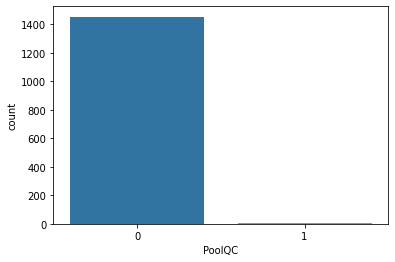

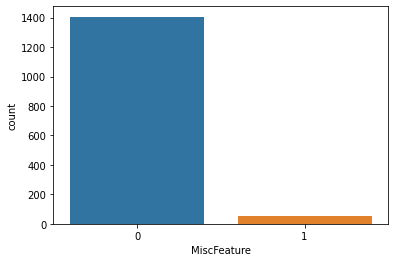

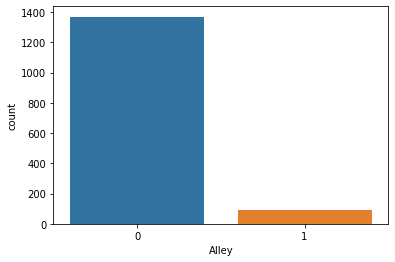

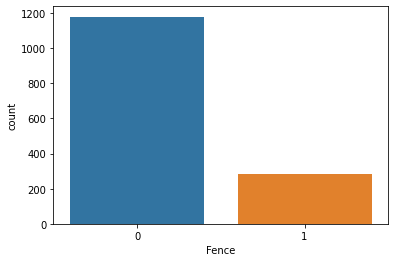

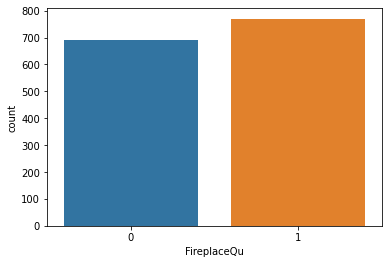

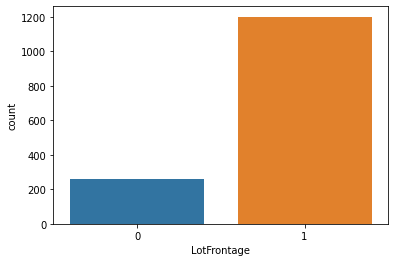

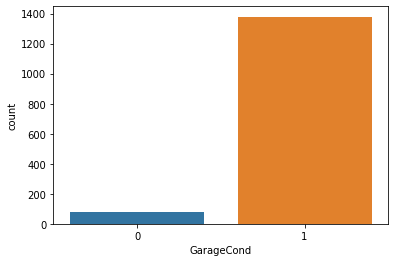

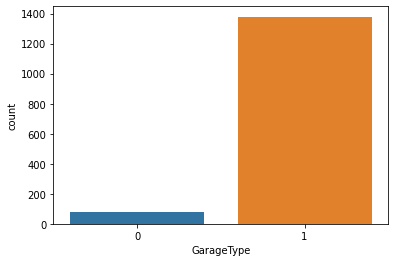

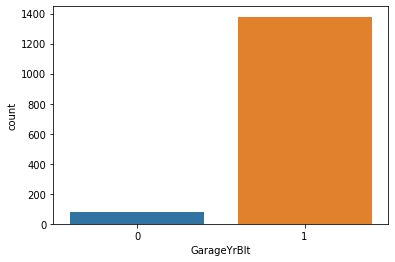

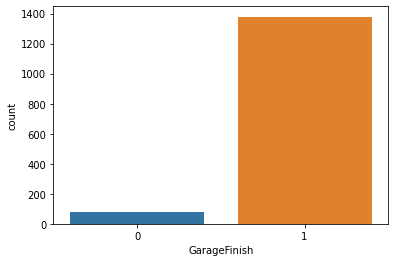

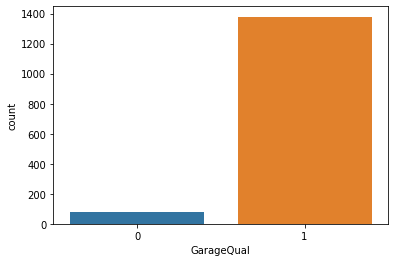

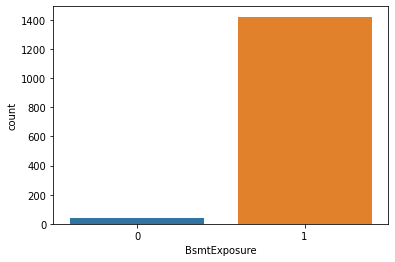

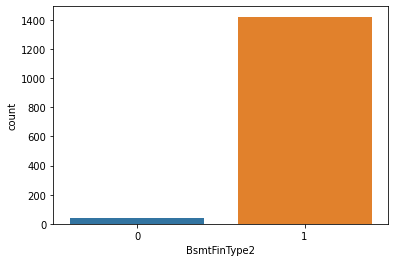

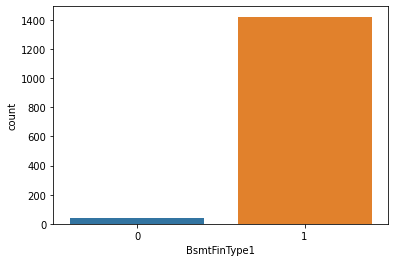

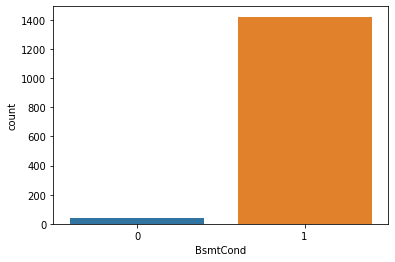

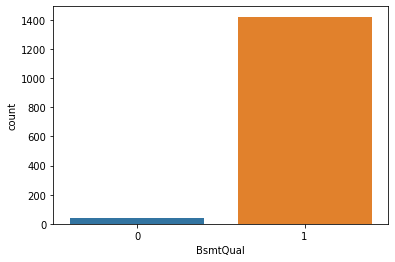

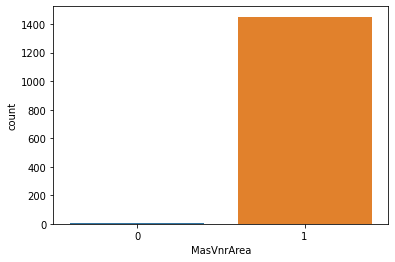

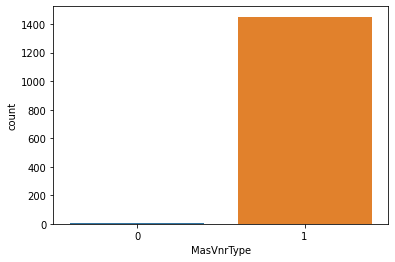

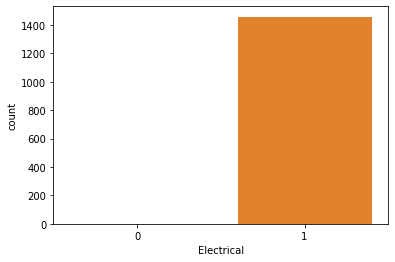

In [ ]:
# visualizing number of nan in evrey columns
data_set=data.copy()
missing_cols=list(missing.index)
for num,i in enumerate(missing_cols):
    plt.figure(num+1)
    data_set[i]=(data_set[i].notna()).astype('int')
    sns.countplot(x=i,data=data_set)

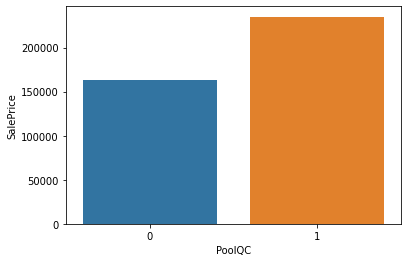

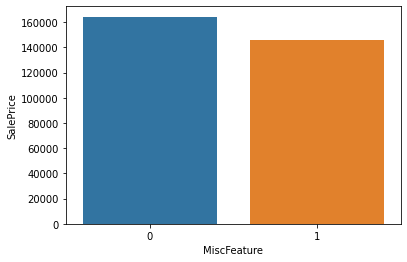

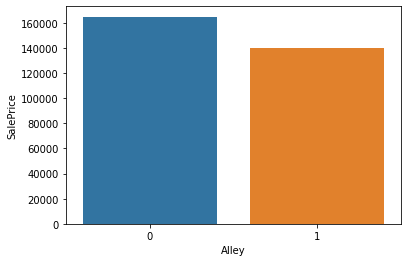

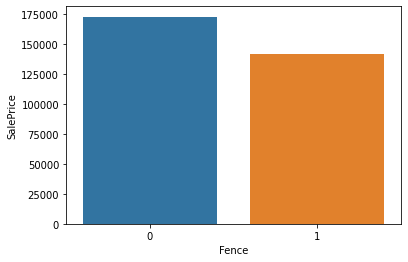

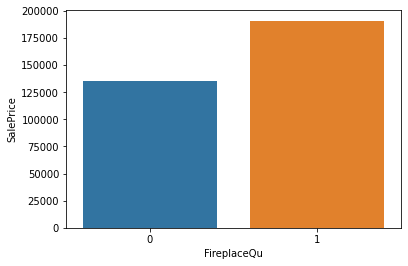

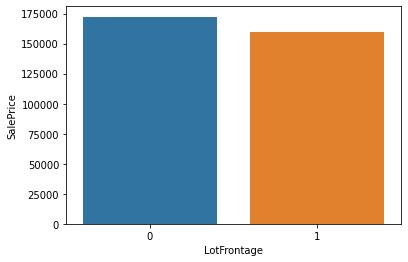

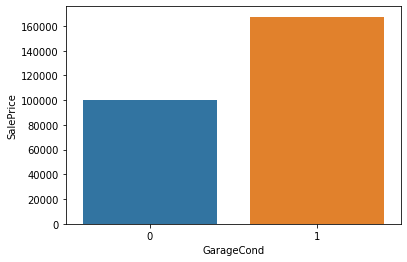

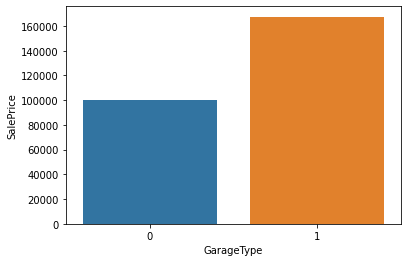

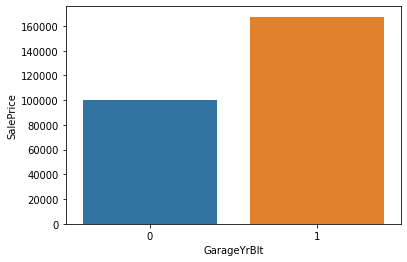

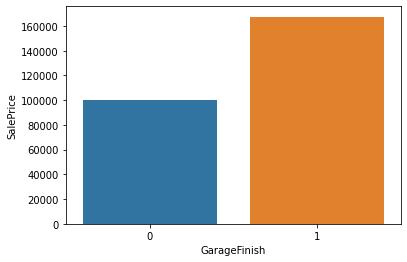

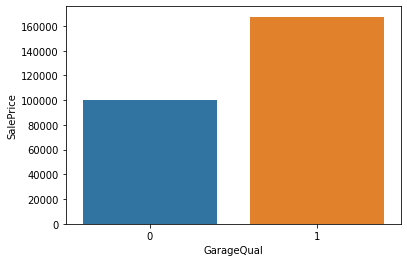

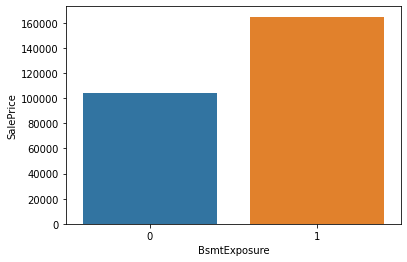

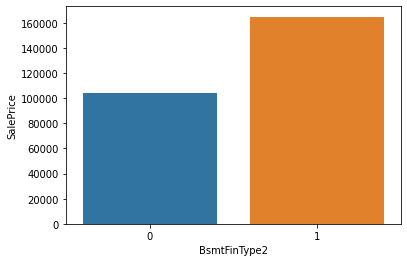

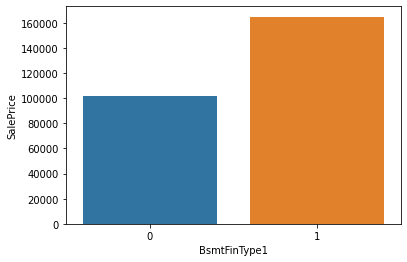

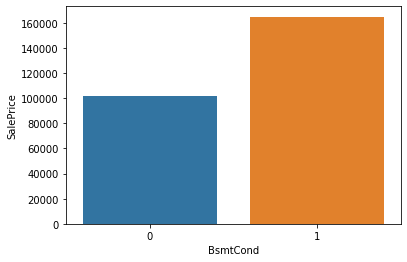

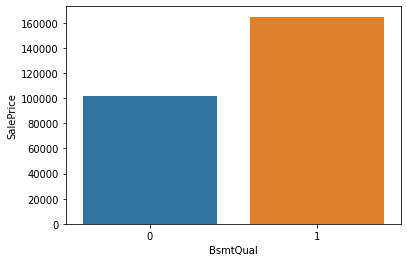

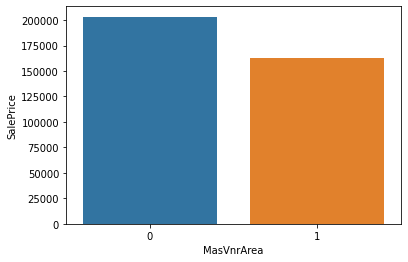

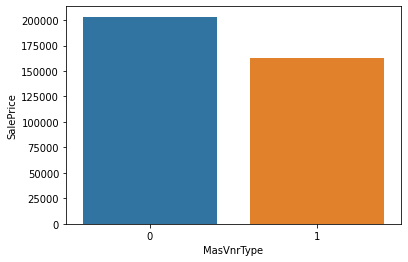

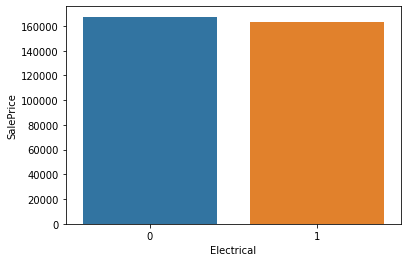

In [ ]:
# finding the relationship betweeen nans and salesprice
data_set=data.copy()
for num,i in enumerate(missing_cols):
  plt.figure(num+1)
  data_set[i]=np.where(data_set[i].isnull(),0,1)
  sns.barplot(x=i,y='SalePrice',data=data_set,ci=False,estimator=np.median)


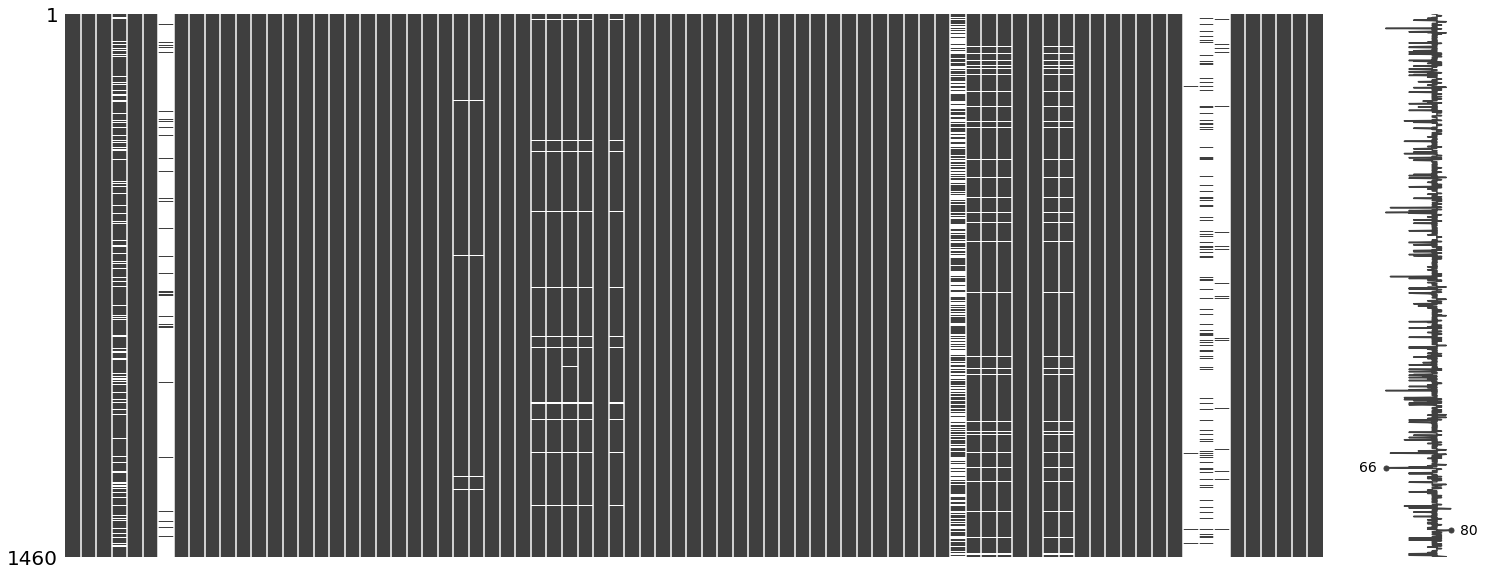

In [ ]:
# visulaizing nans in matrix form matrix
msno.matrix(data)

# Numeric data

In [ ]:
numeric_cols=list(data.select_dtypes(include=['int64','float64']).columns[1:])

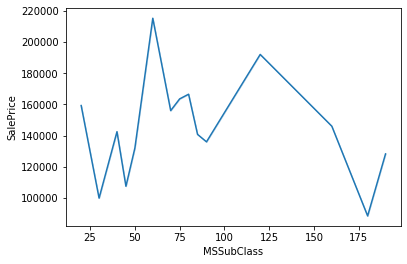

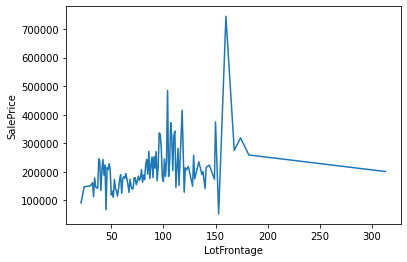

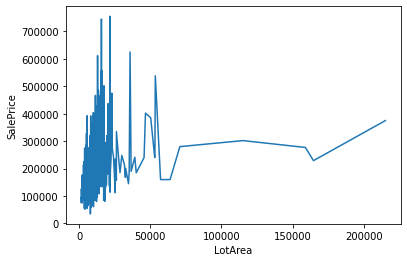

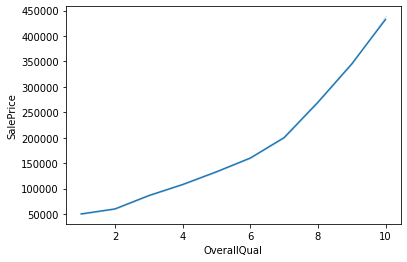

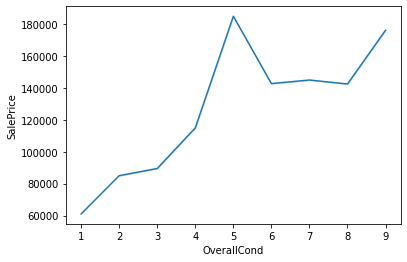

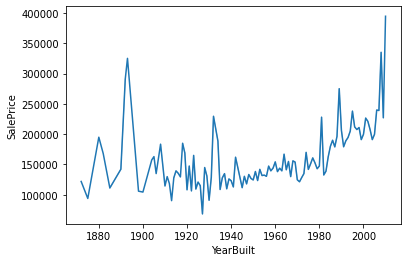

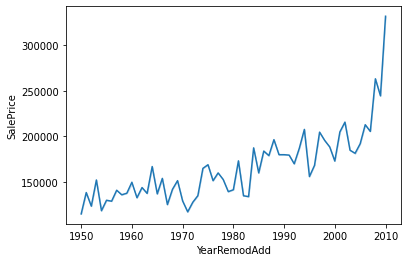

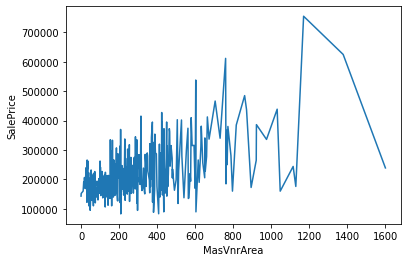

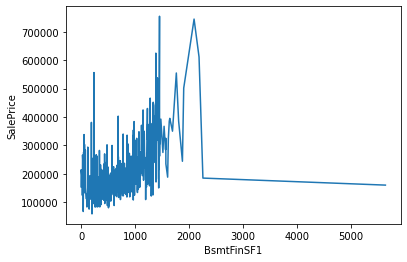

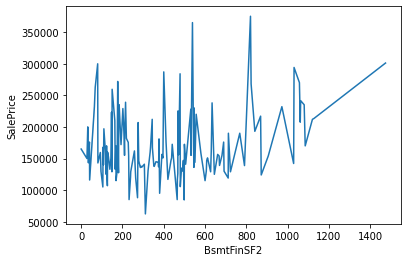

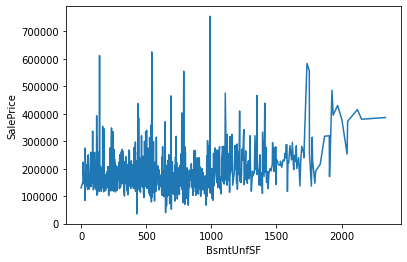

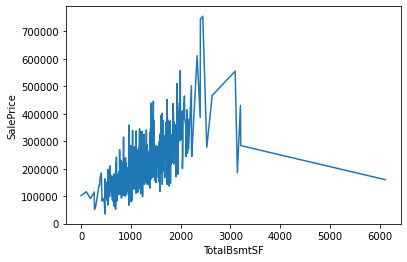

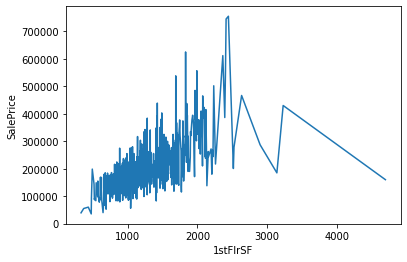

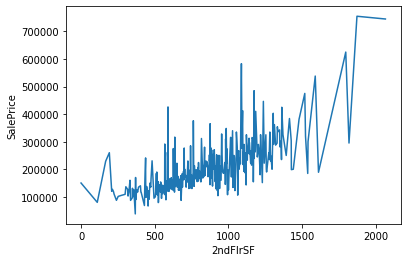

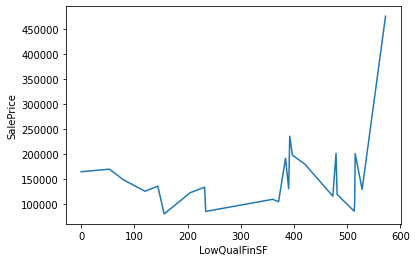

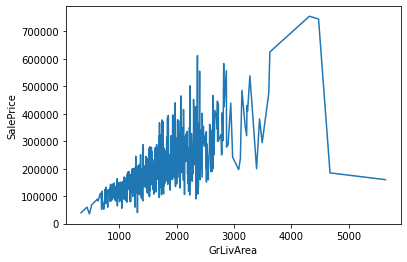

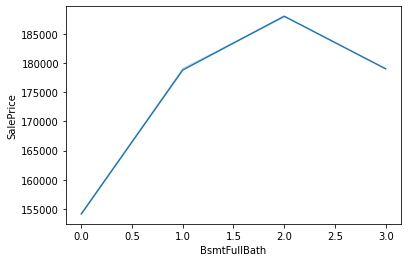

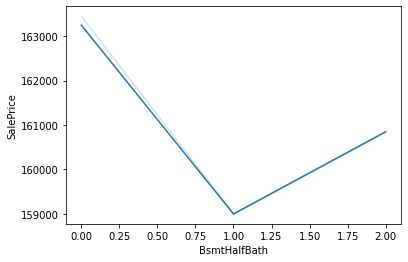

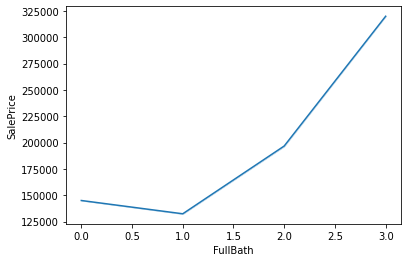

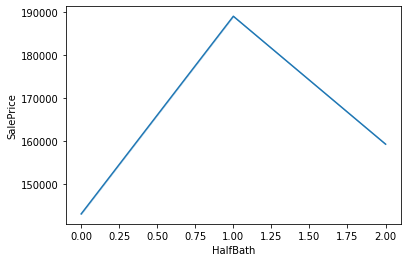

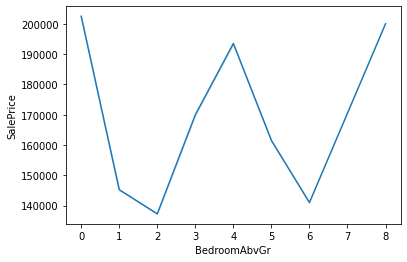

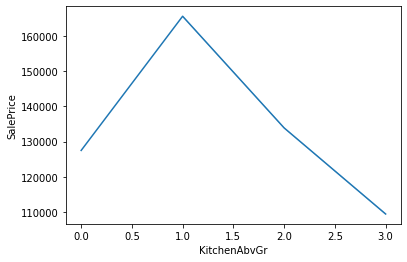

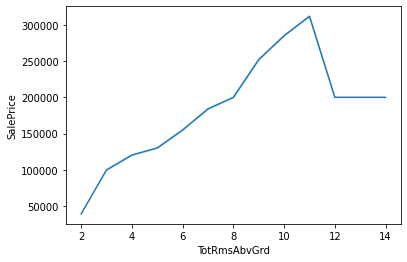

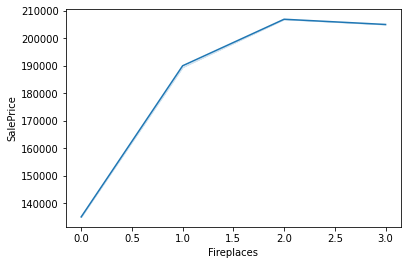

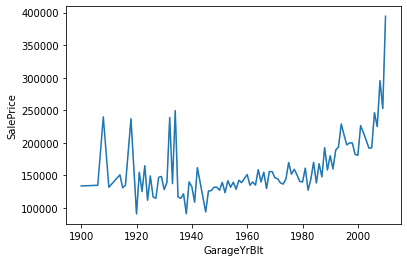

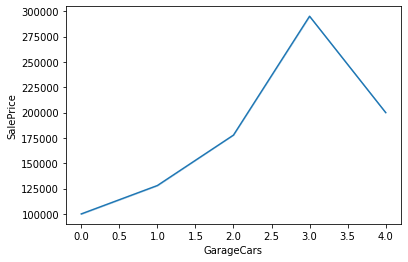

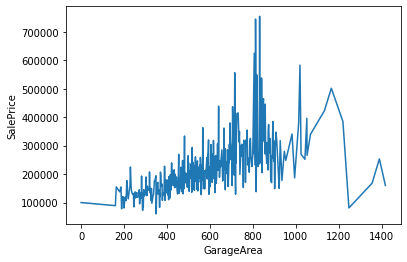

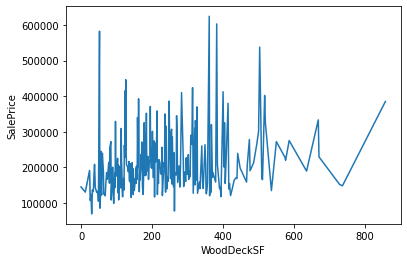

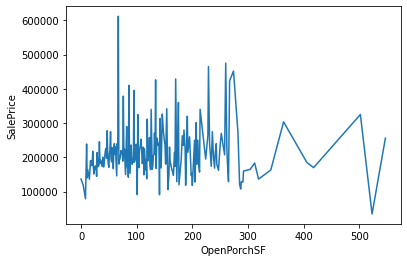

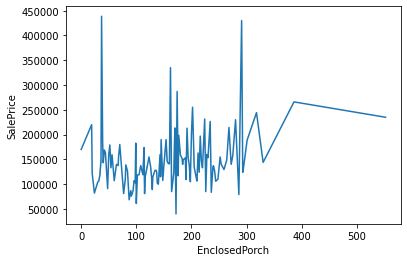

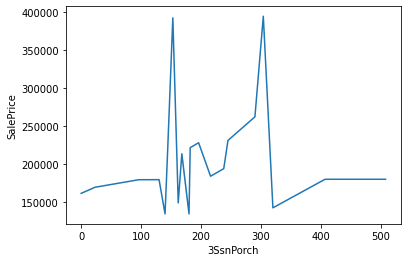

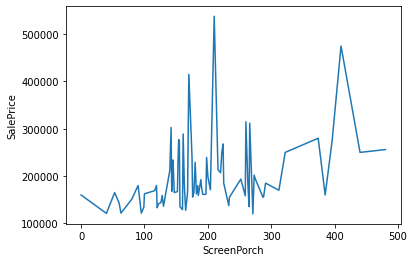

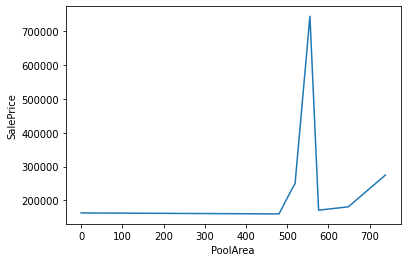

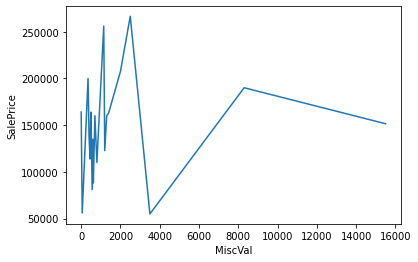

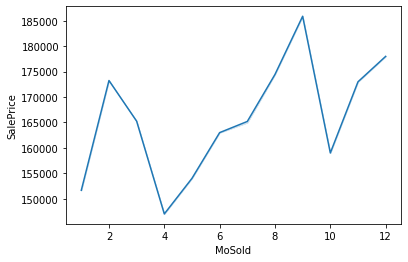

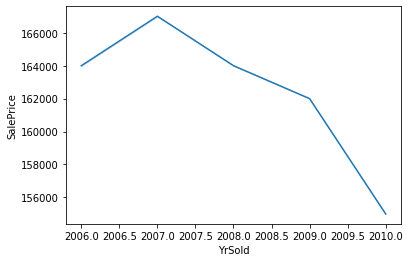

In [ ]:
plt.figure()
for num,i in enumerate(numeric_cols):
  if i != 'SalePrice':
    plt.figure(num+1)
    sns.lineplot(x=i,y='SalePrice',data=data,estimator=np.median,ci=False)
  mlp.rcParams.update({'figure.max_open_warning': 0})

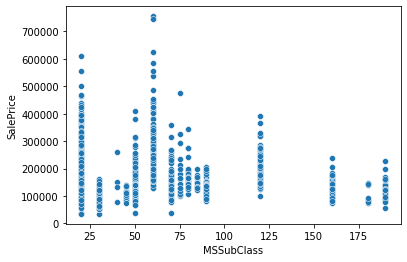

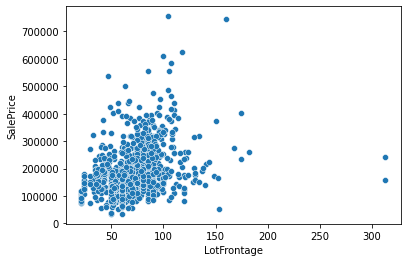

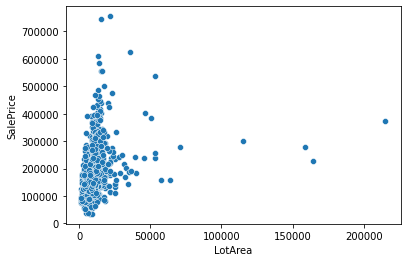

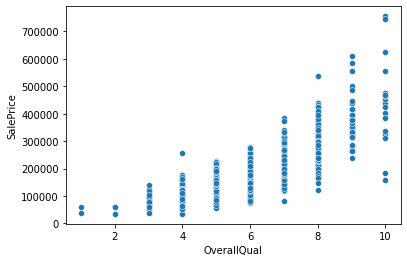

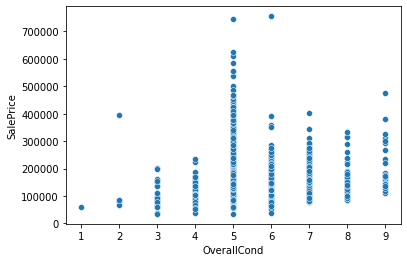

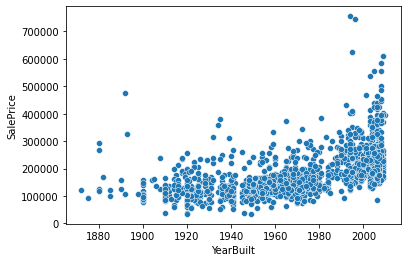

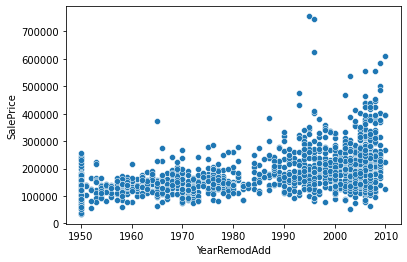

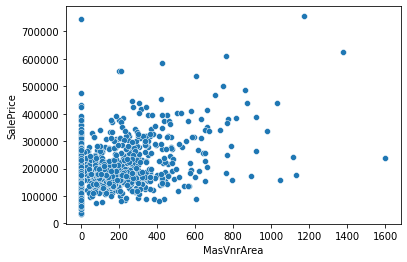

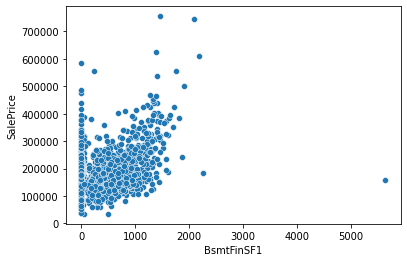

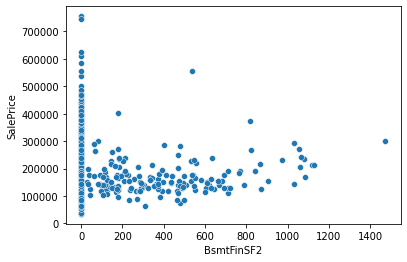

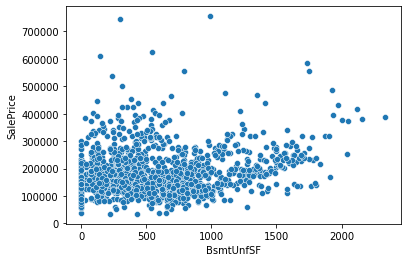

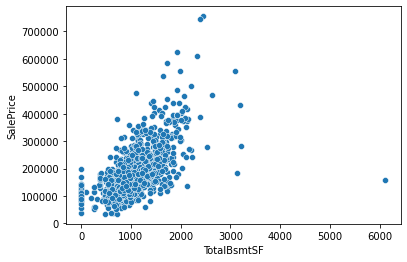

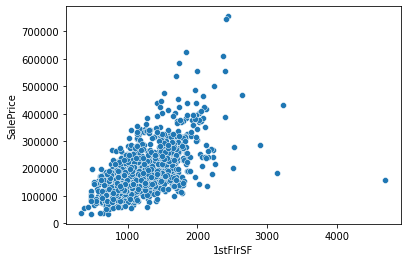

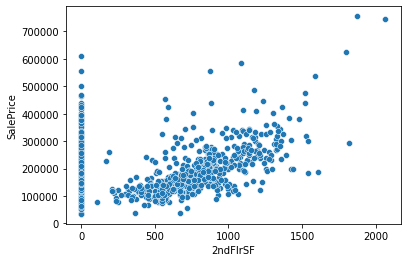

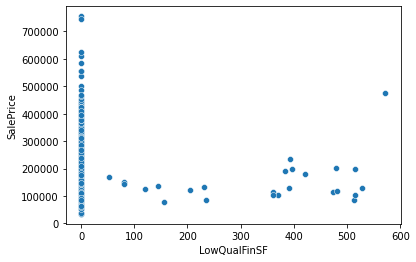

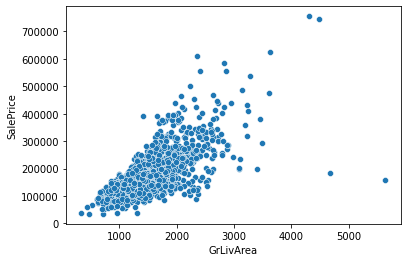

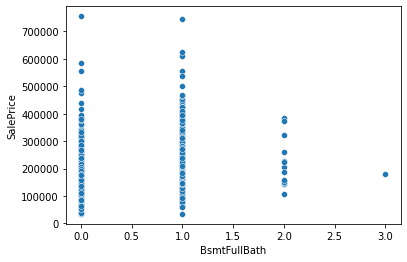

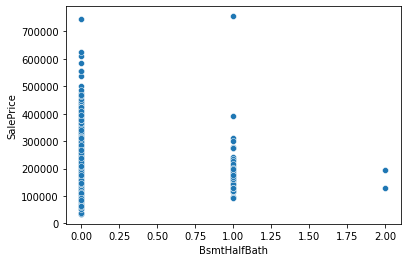

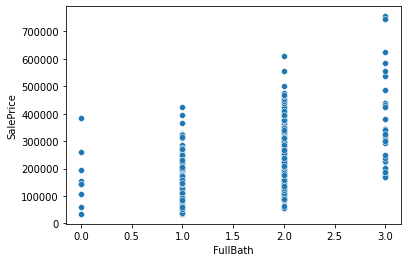

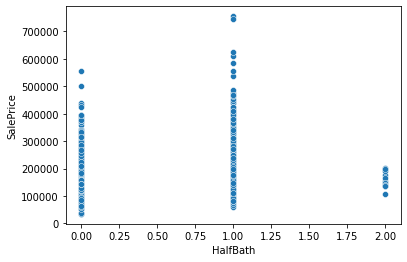

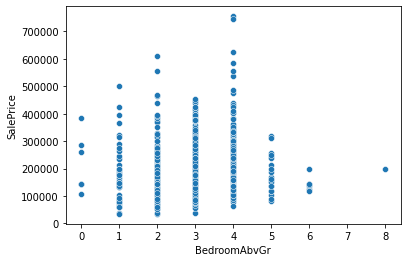

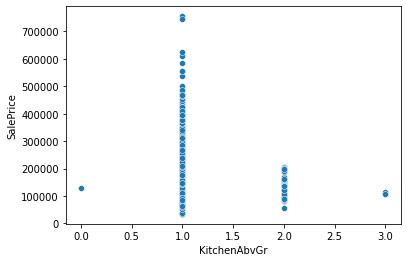

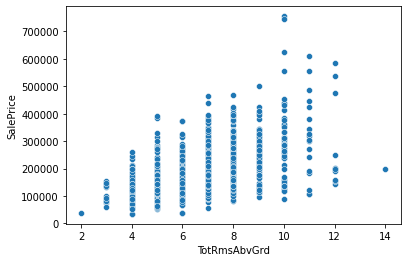

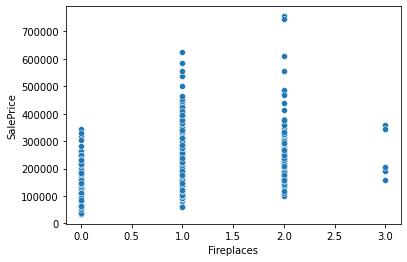

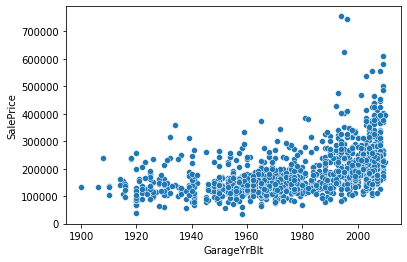

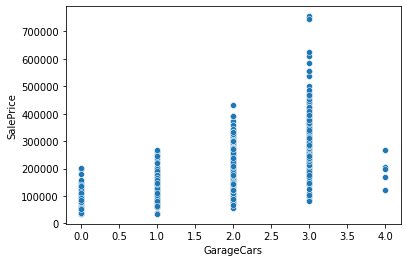

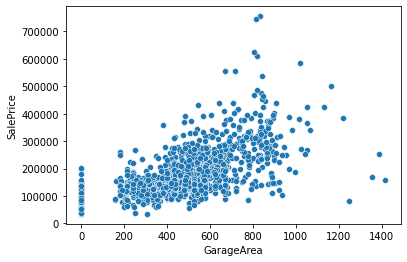

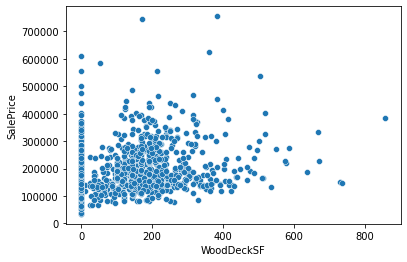

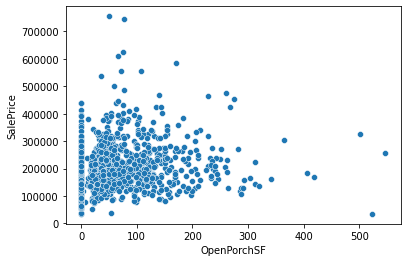

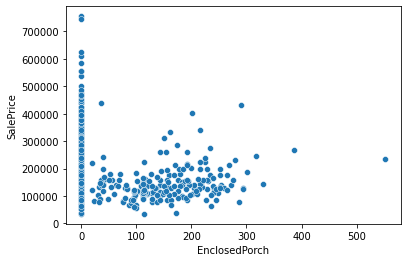

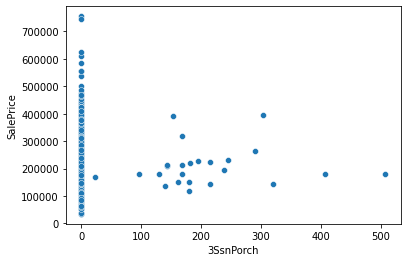

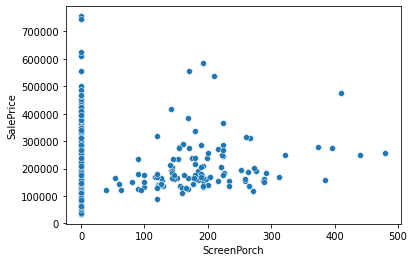

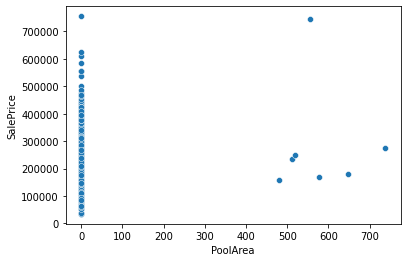

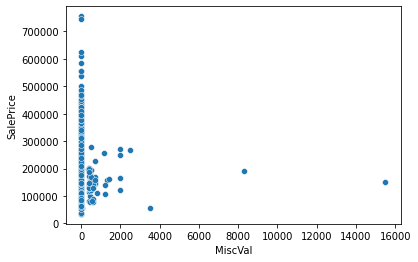

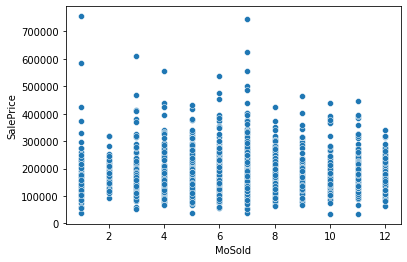

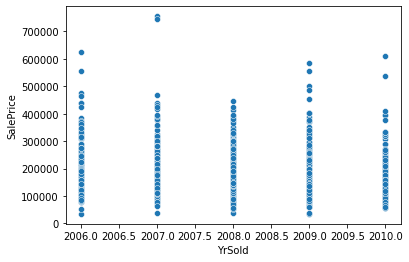

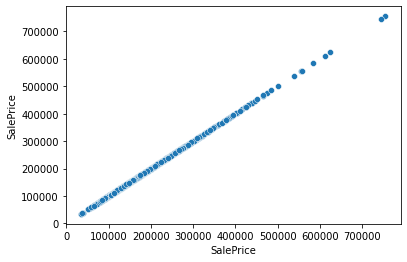

In [ ]:
plt.figure()

for num,i in enumerate(numeric_cols):
  plt.figure(num+1)
  sns.scatterplot(x=i,y='SalePrice',data=data,estimator=np.median)
  plt.xlabel(i)

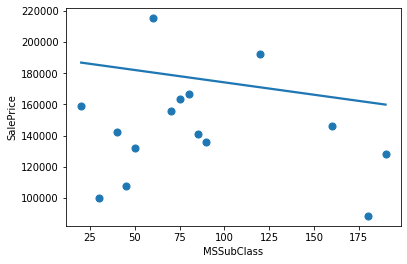

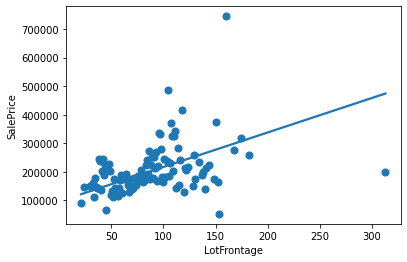

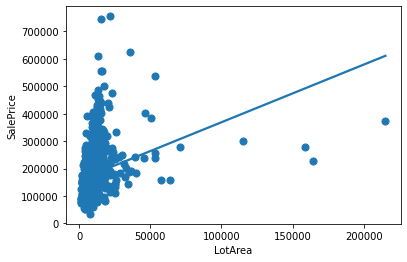

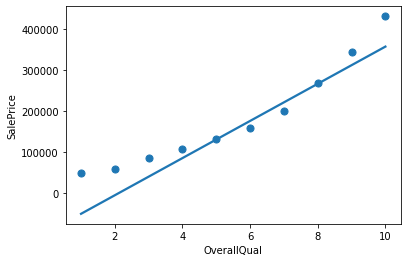

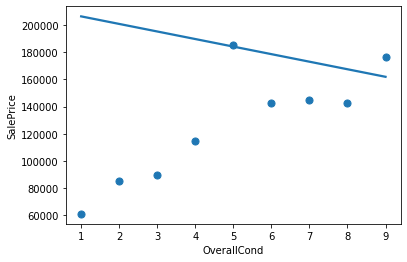

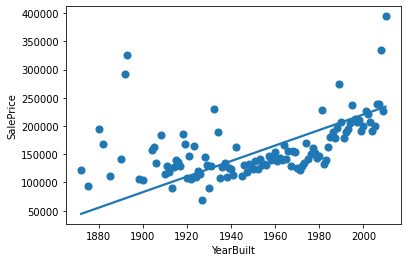

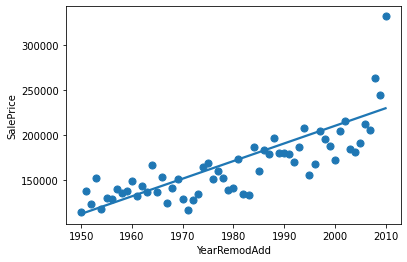

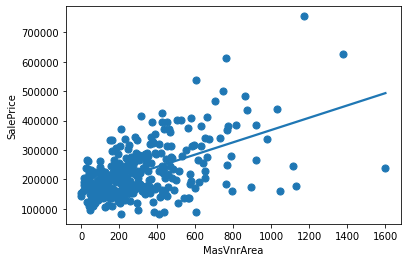

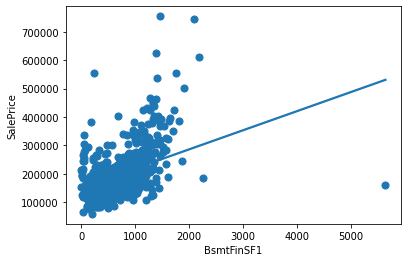

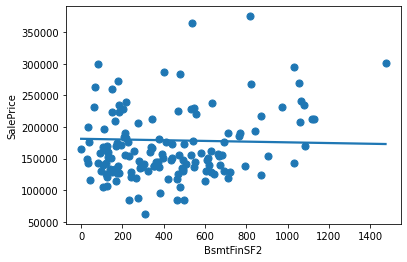

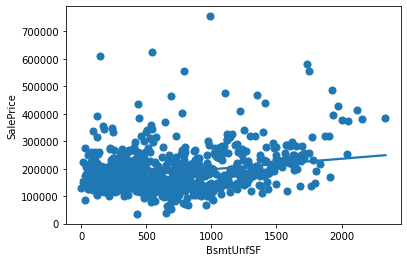

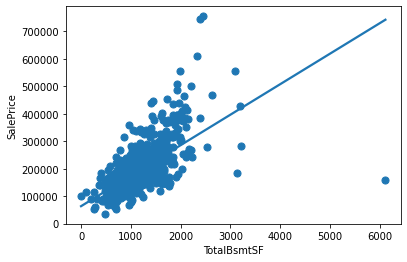

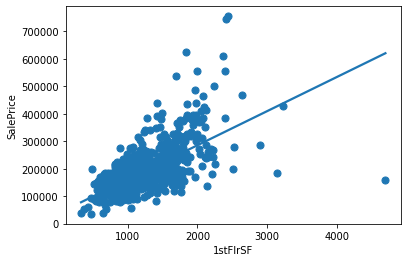

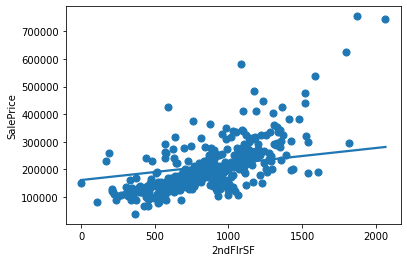

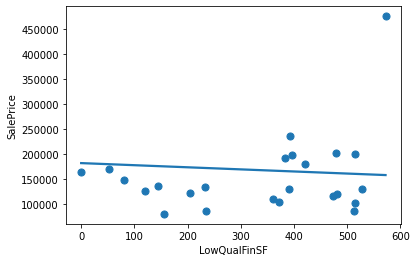

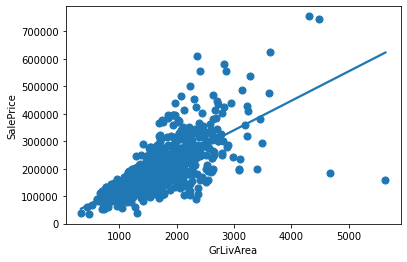

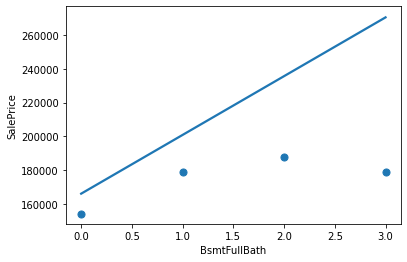

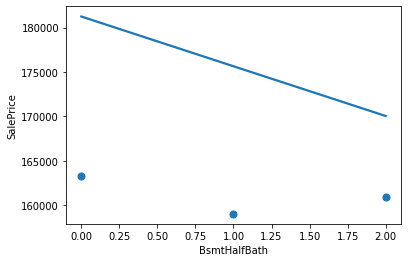

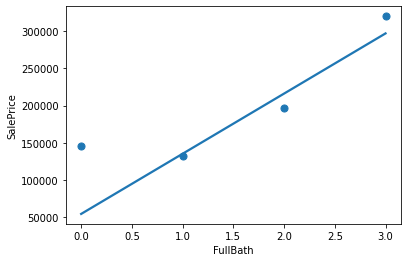

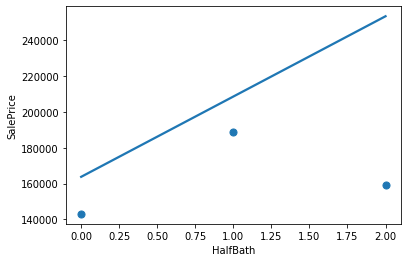

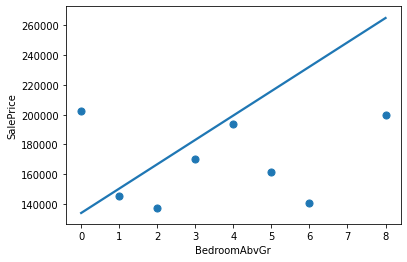

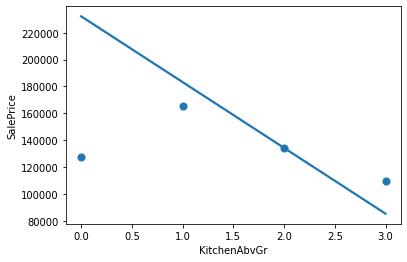

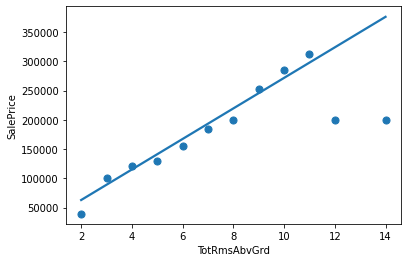

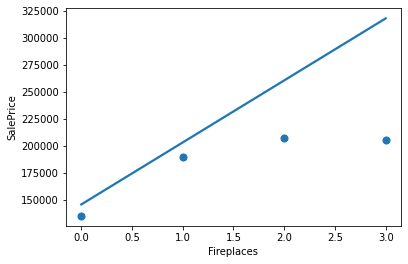

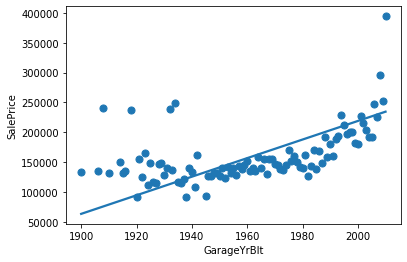

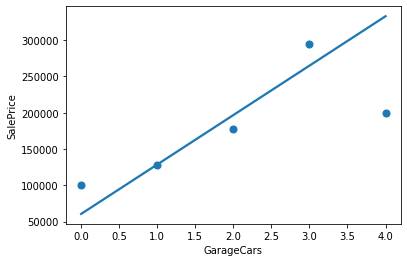

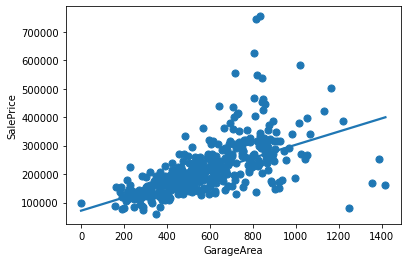

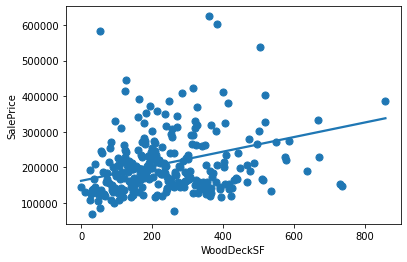

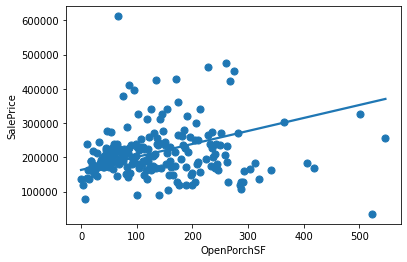

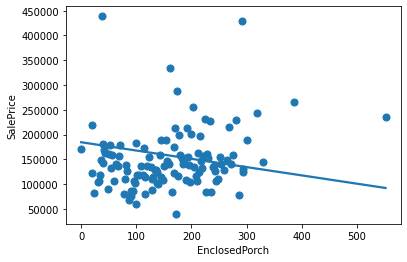

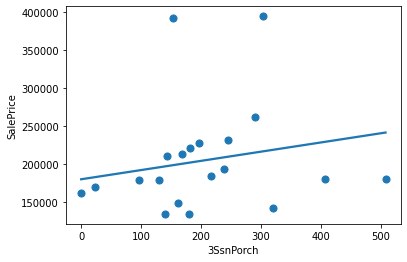

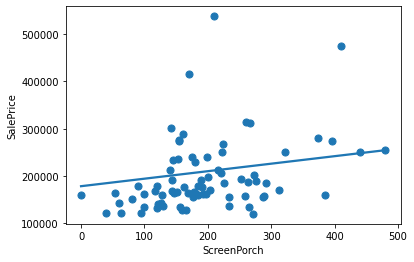

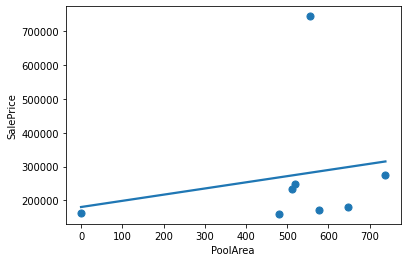

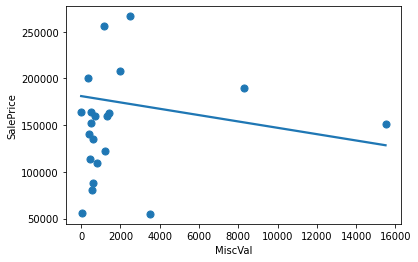

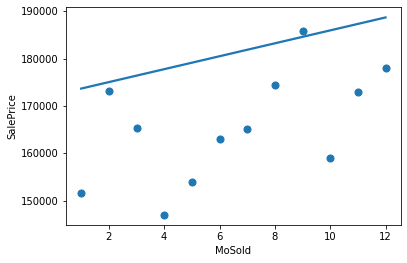

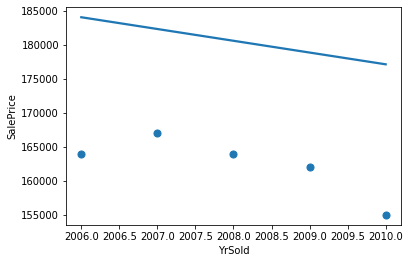

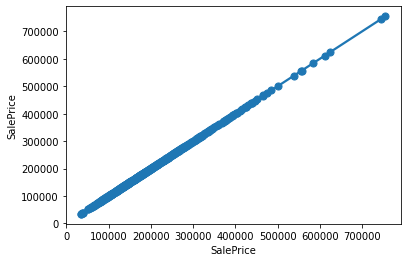

In [ ]:
plt.figure()

for num,i in enumerate(numeric_cols):
  plt.figure(num+1)
  sns.regplot(x=i,y='SalePrice',data=data,x_estimator=np.median,ci=False)

# distribution visualization

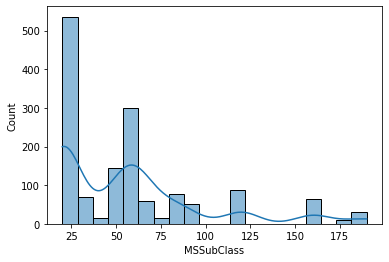

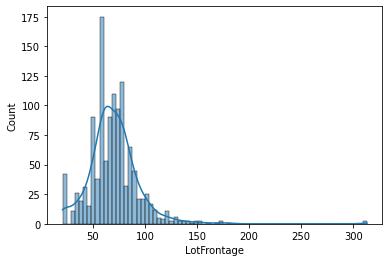

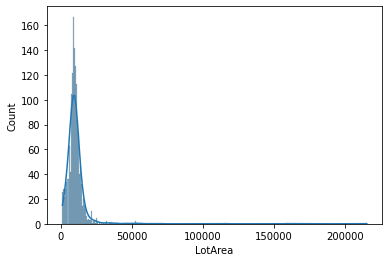

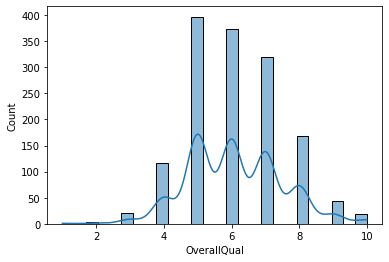

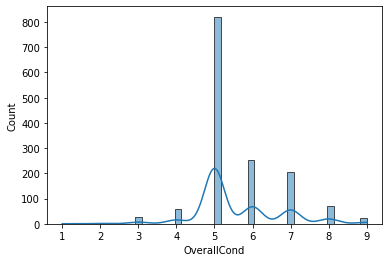

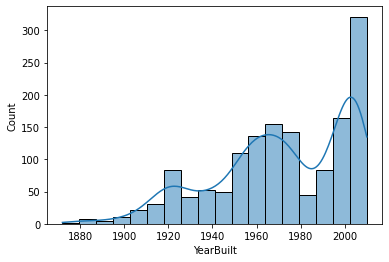

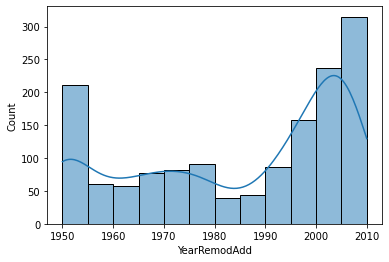

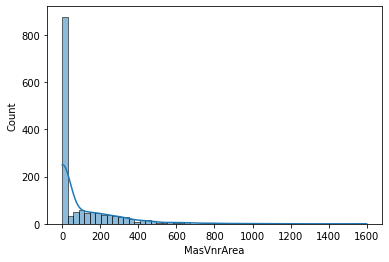

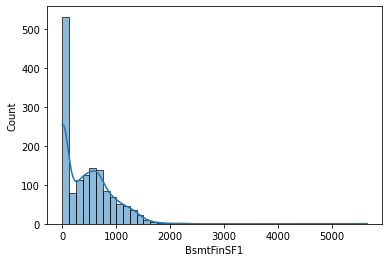

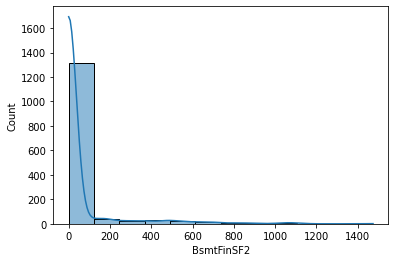

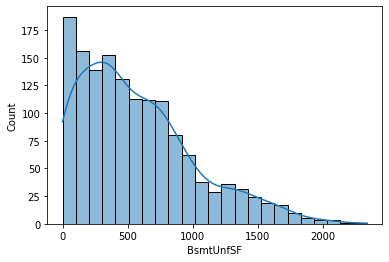

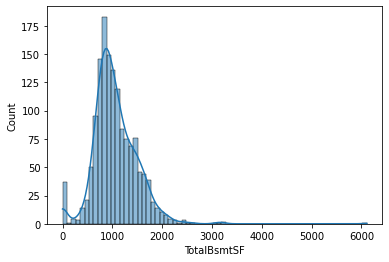

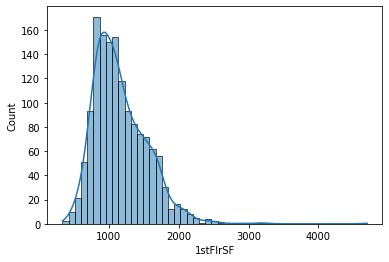

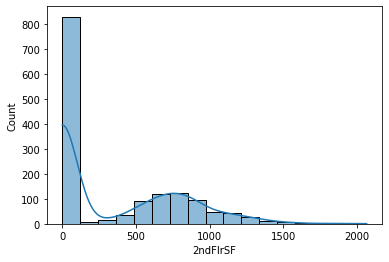

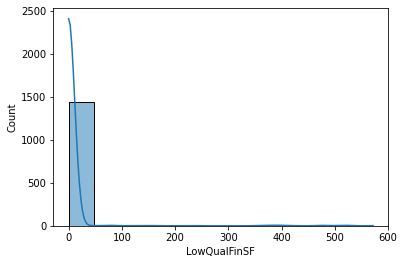

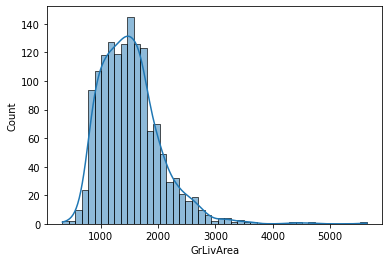

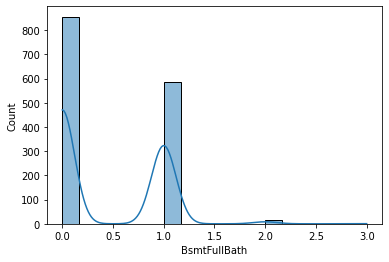

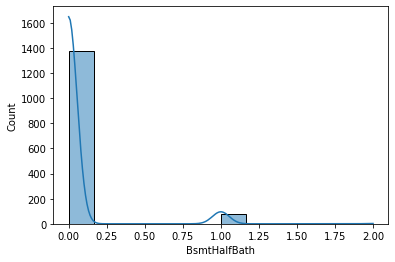

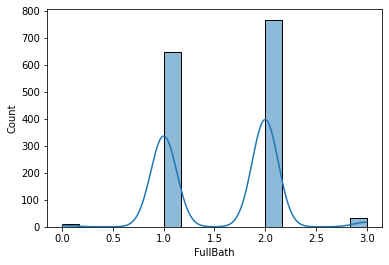

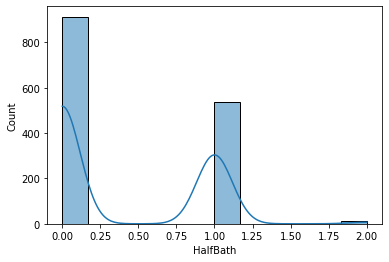

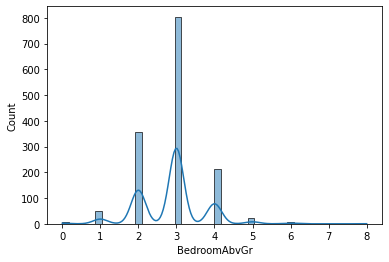

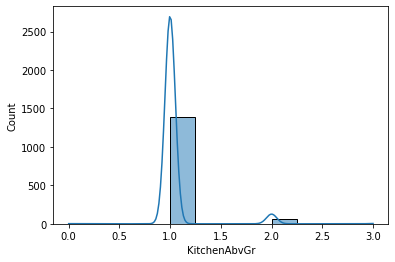

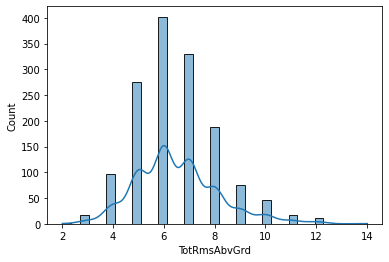

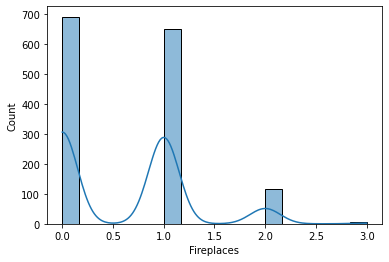

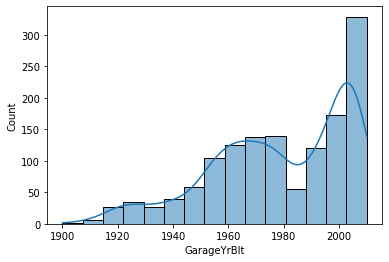

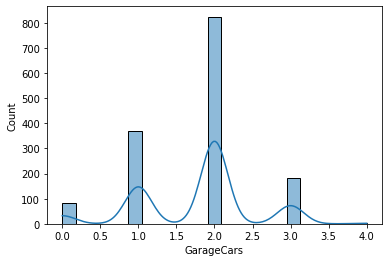

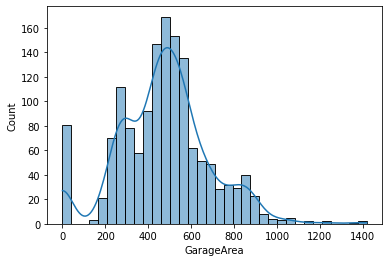

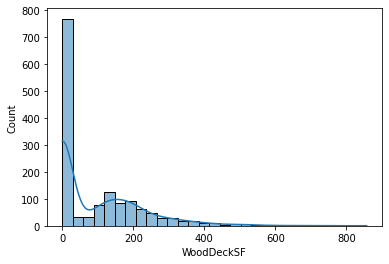

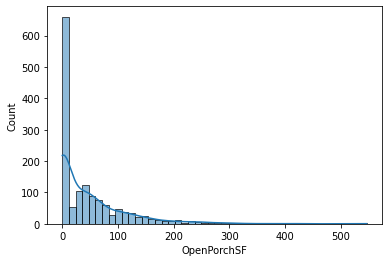

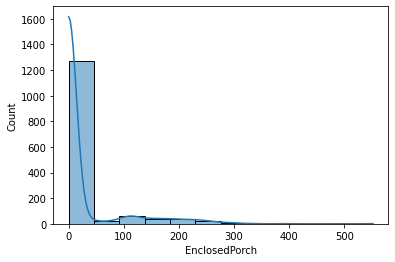

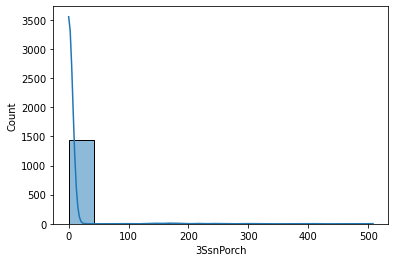

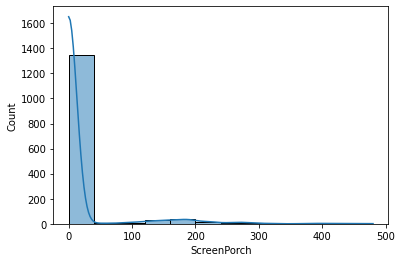

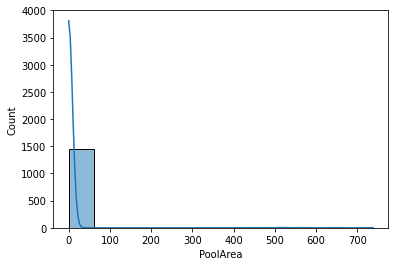

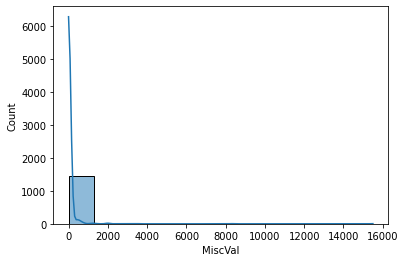

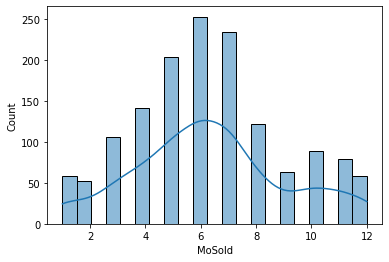

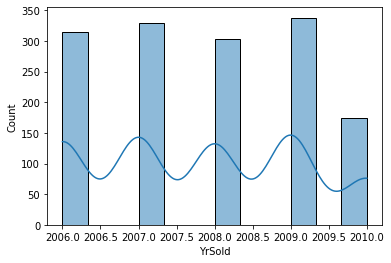

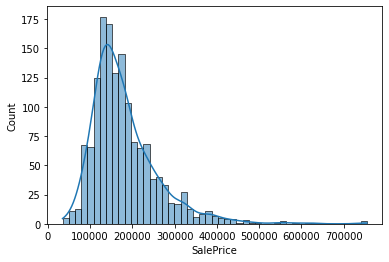

In [ ]:
plt.figure()
for num,i in enumerate(numeric_cols):
  plt.figure(num+1)
  sns.histplot(x=i,data=data,kde=True)

# category visualization

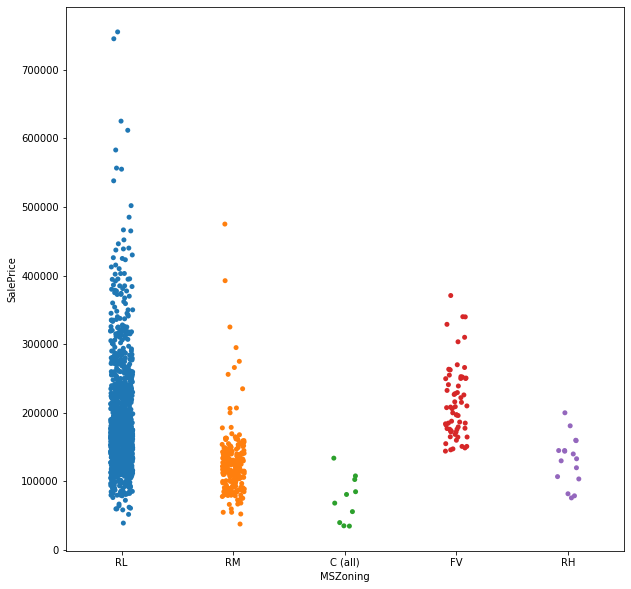

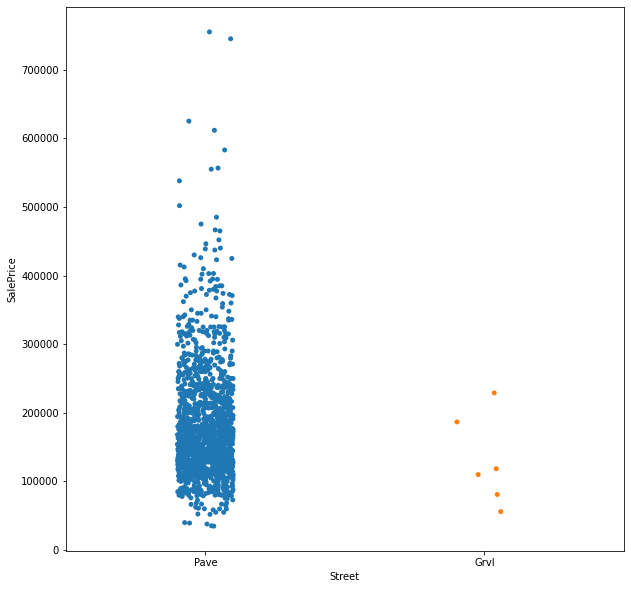

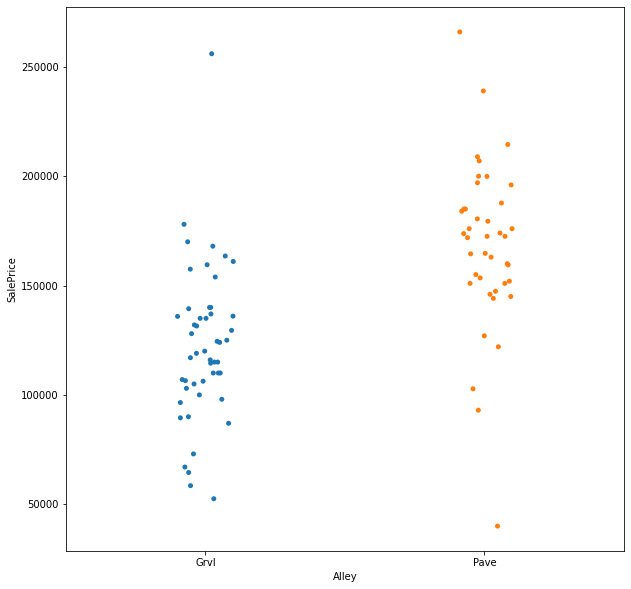

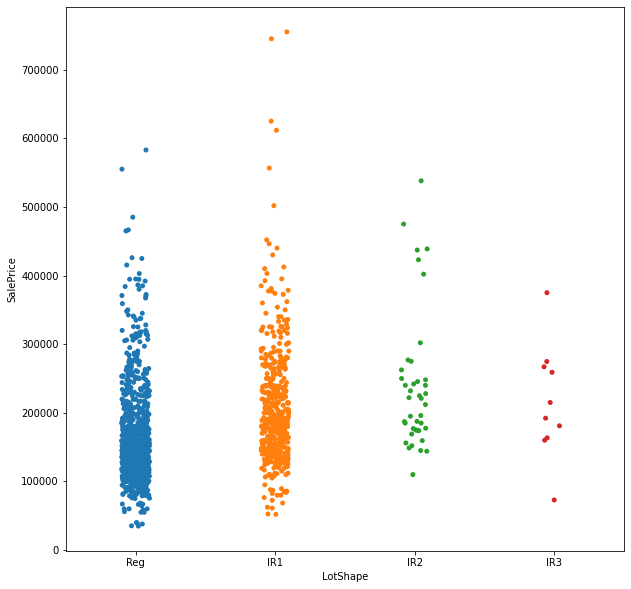

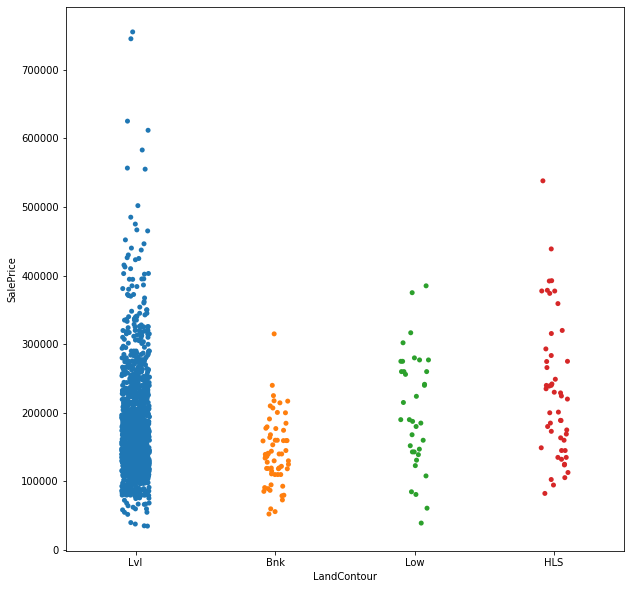

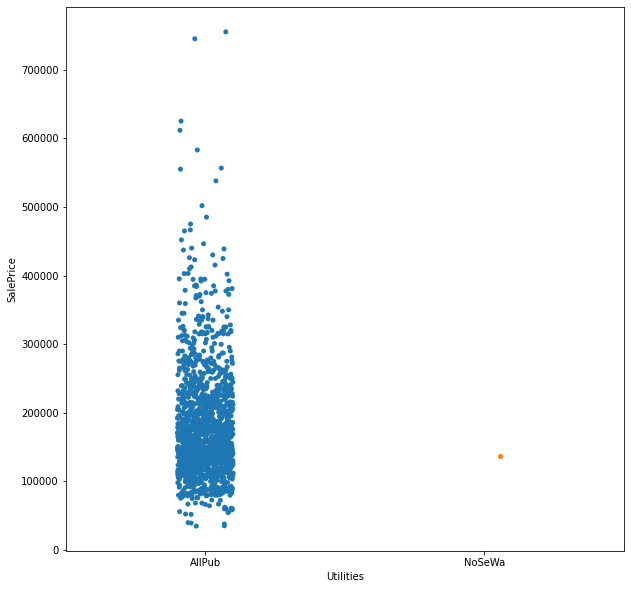

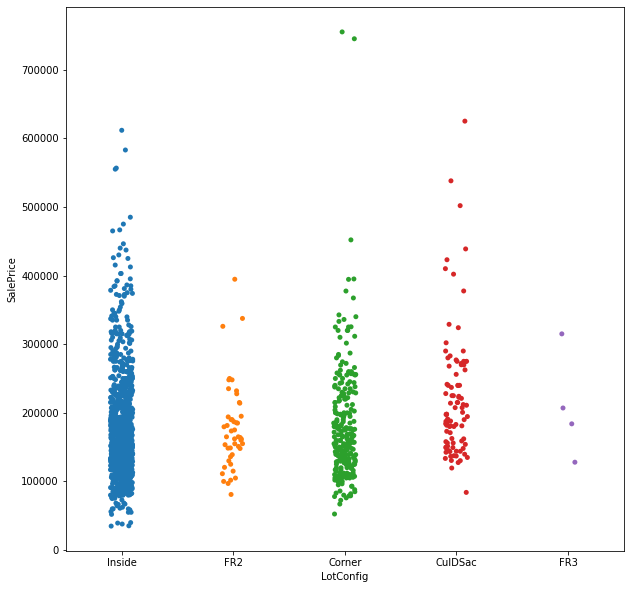

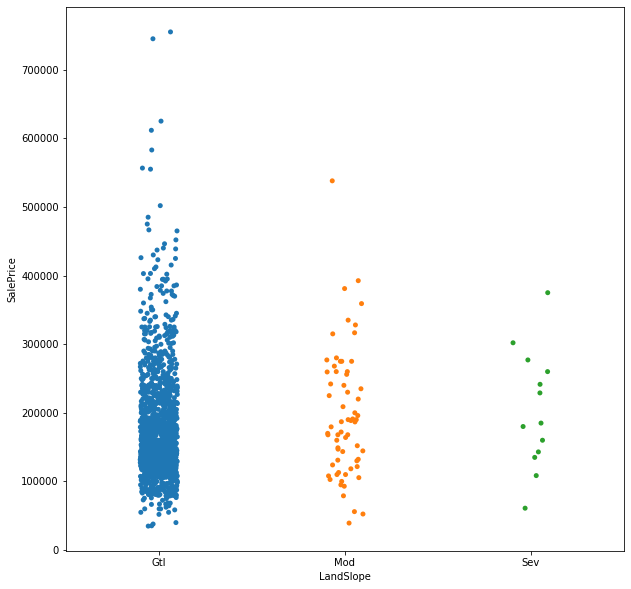

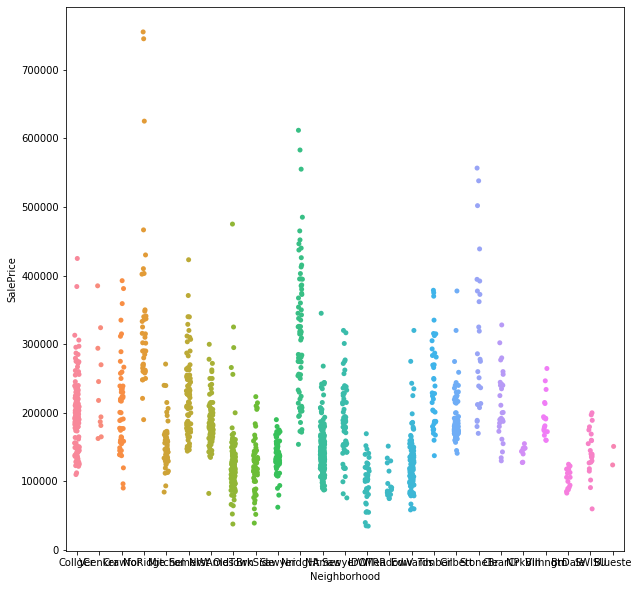

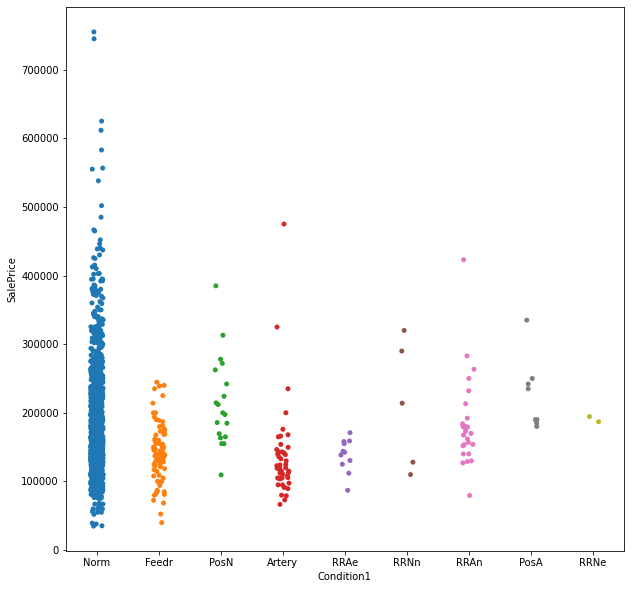

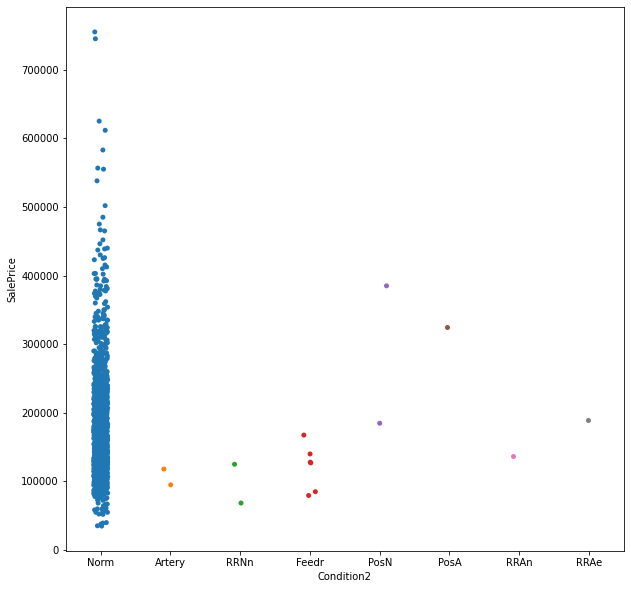

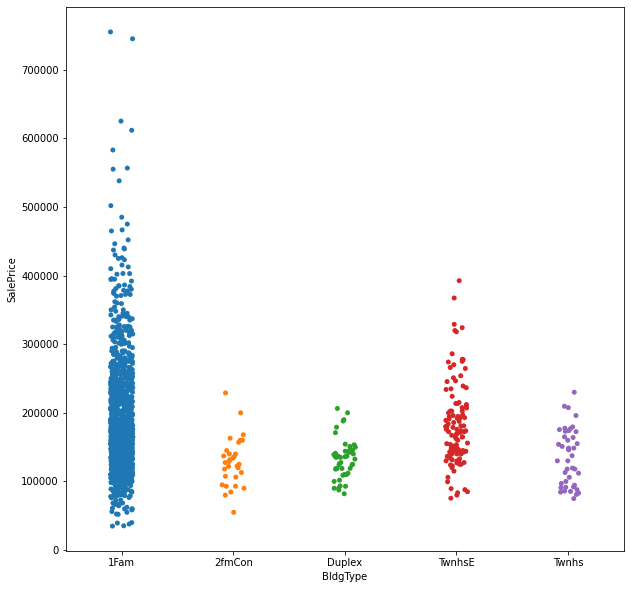

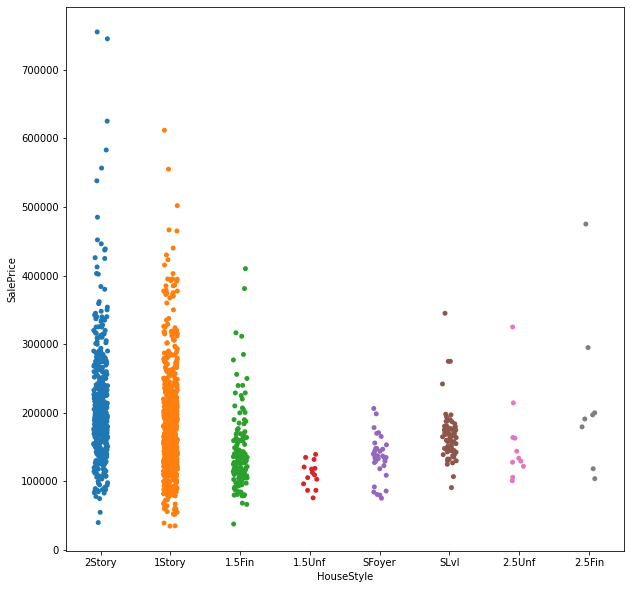

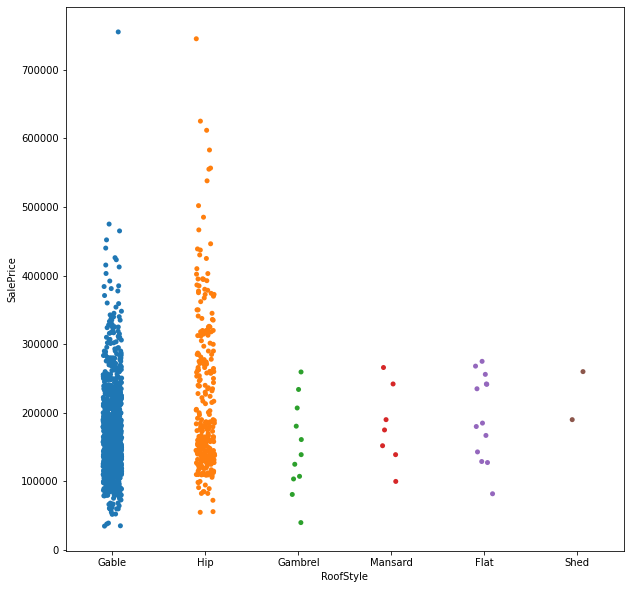

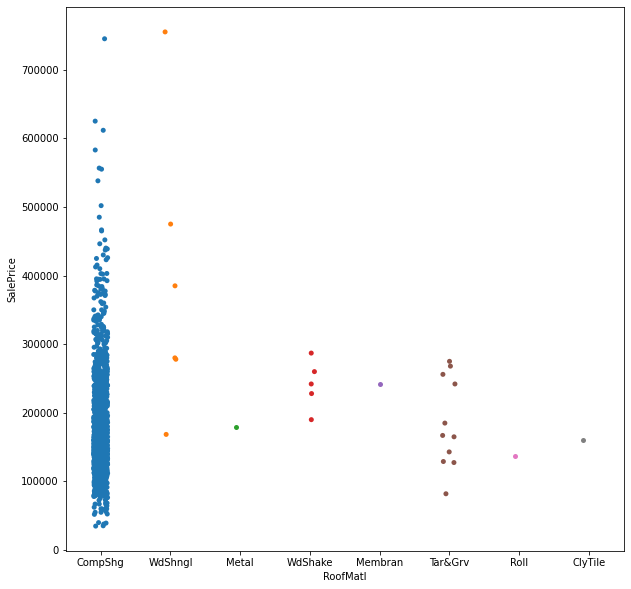

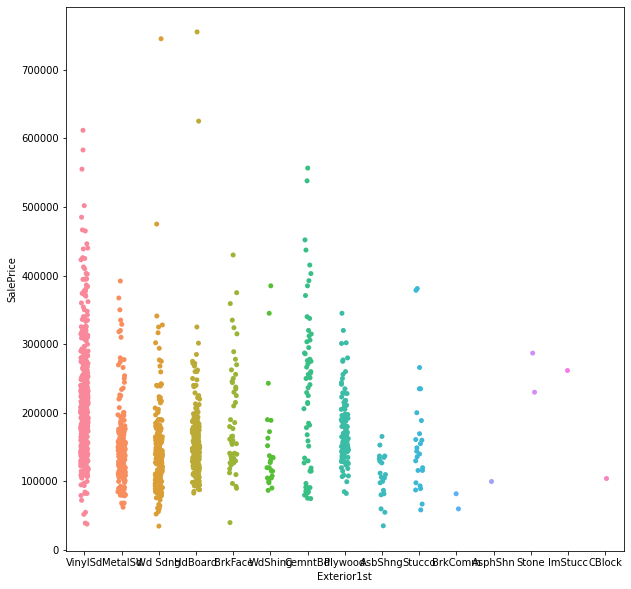

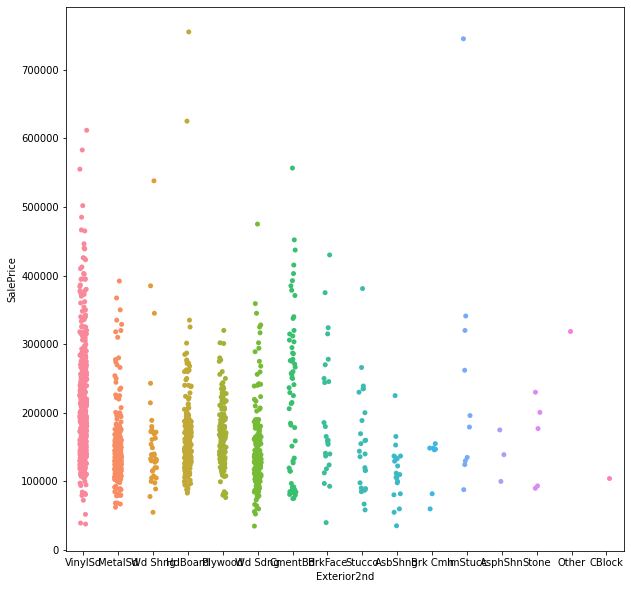

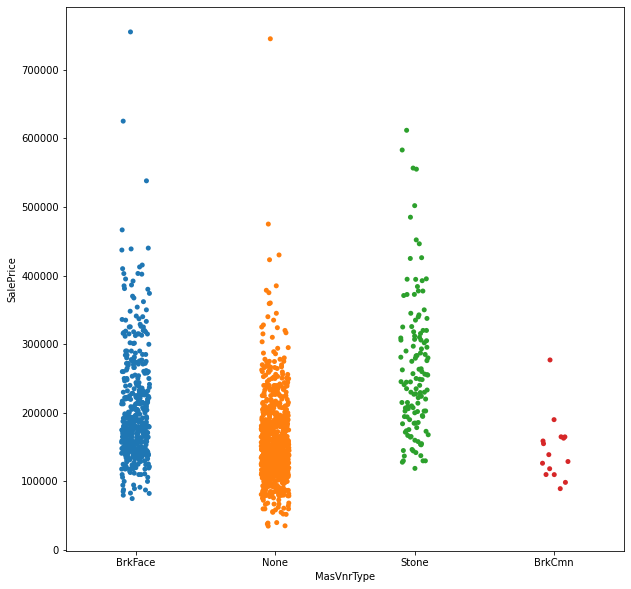

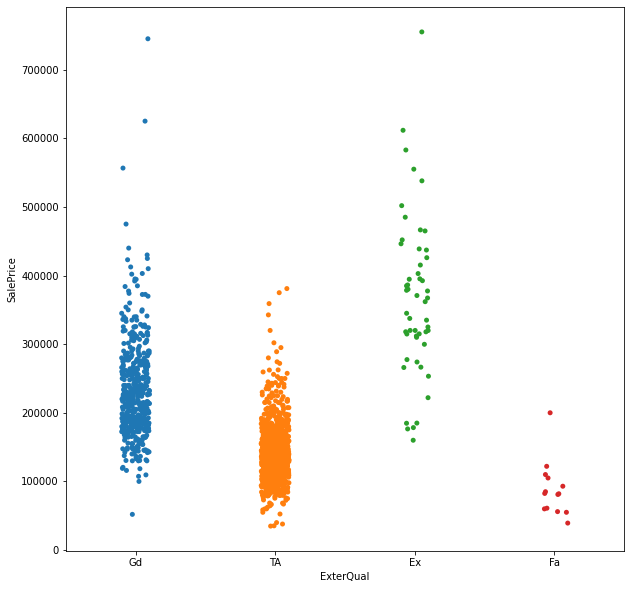

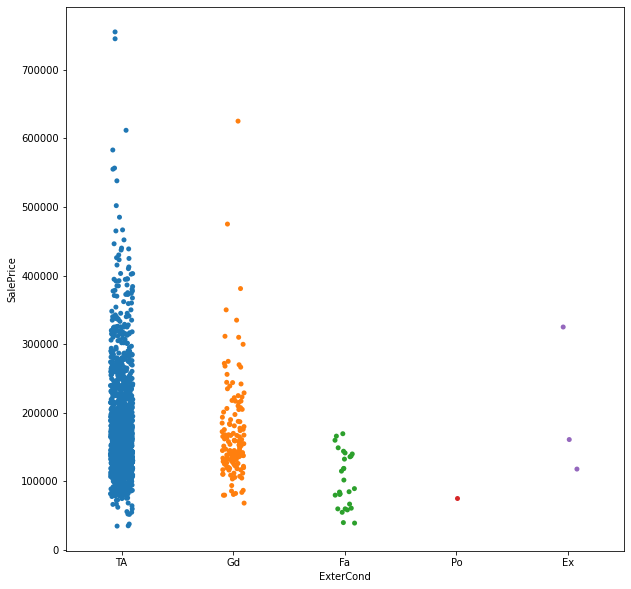

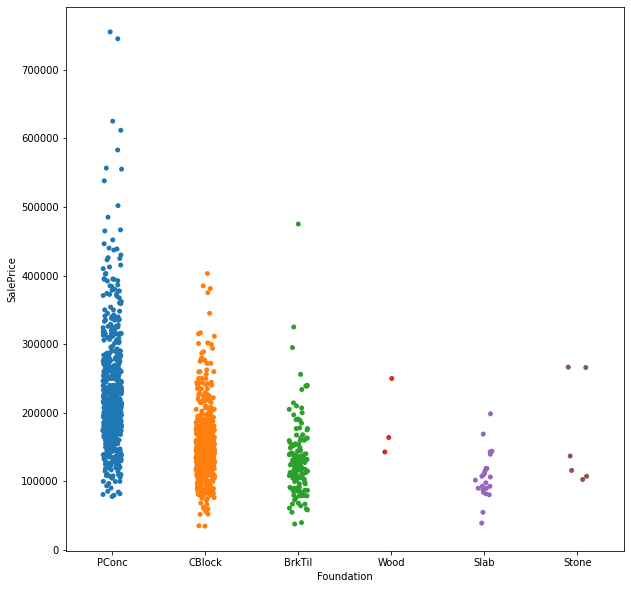

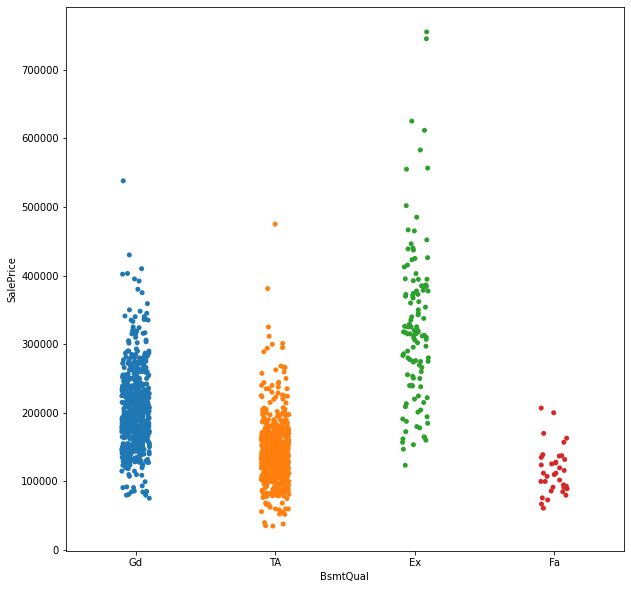

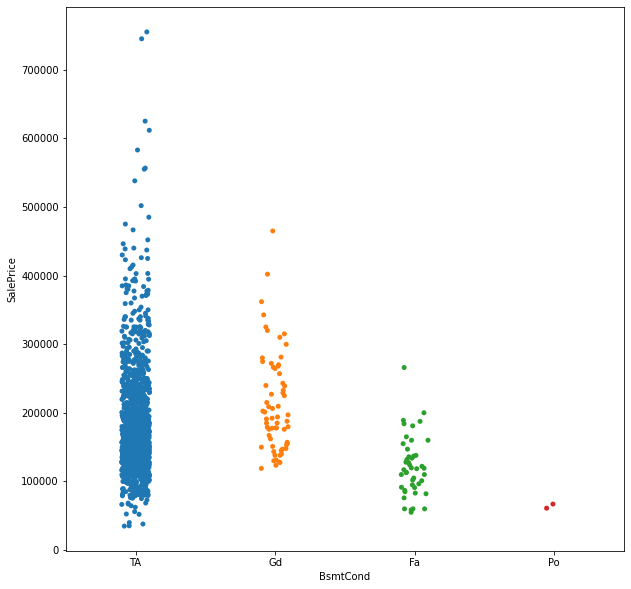

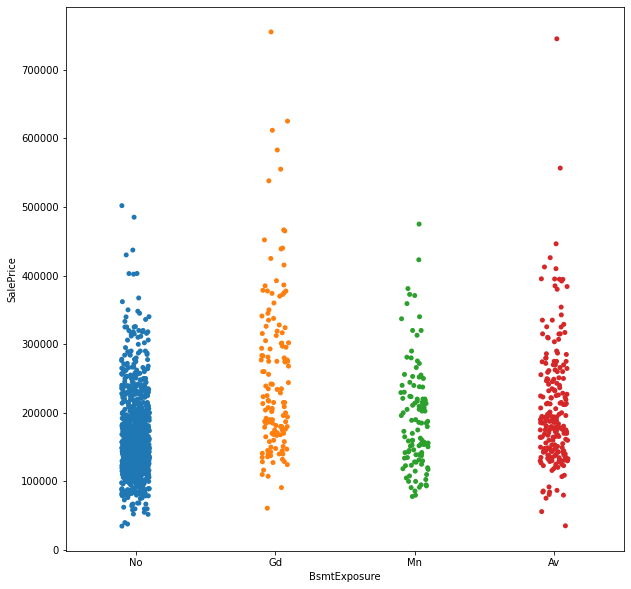

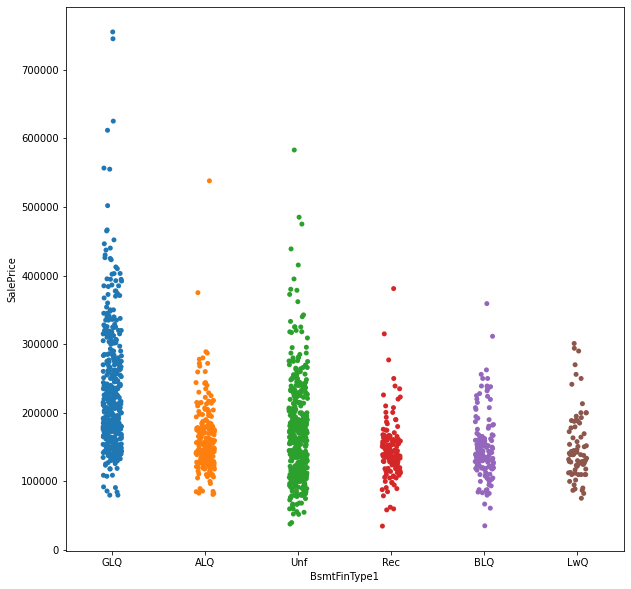

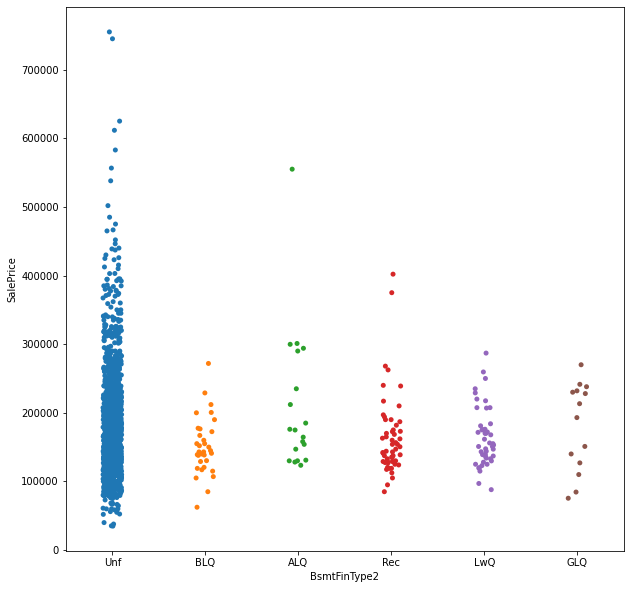

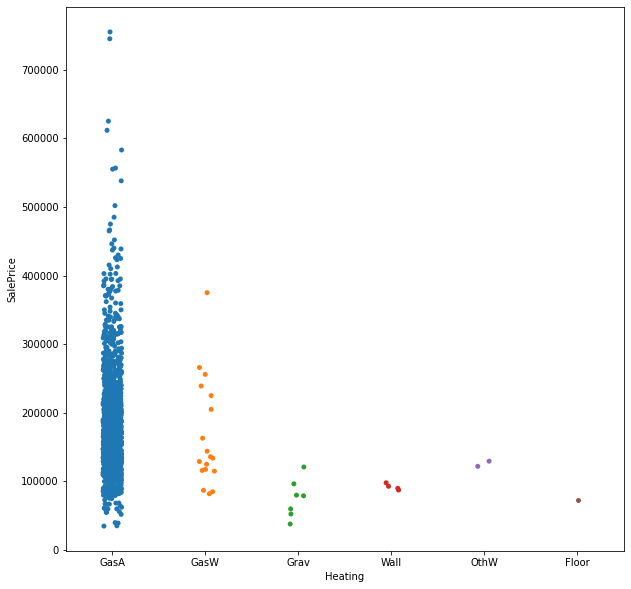

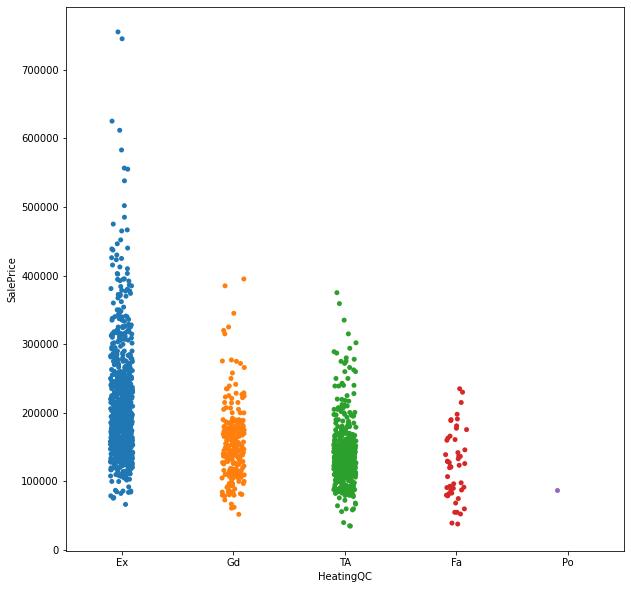

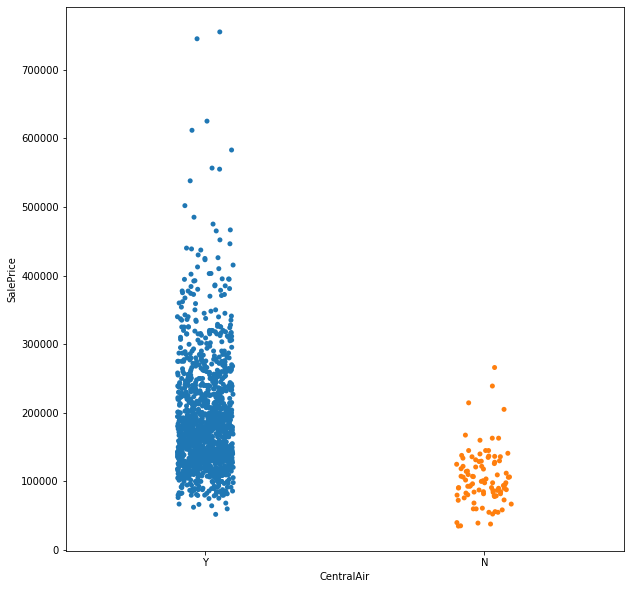

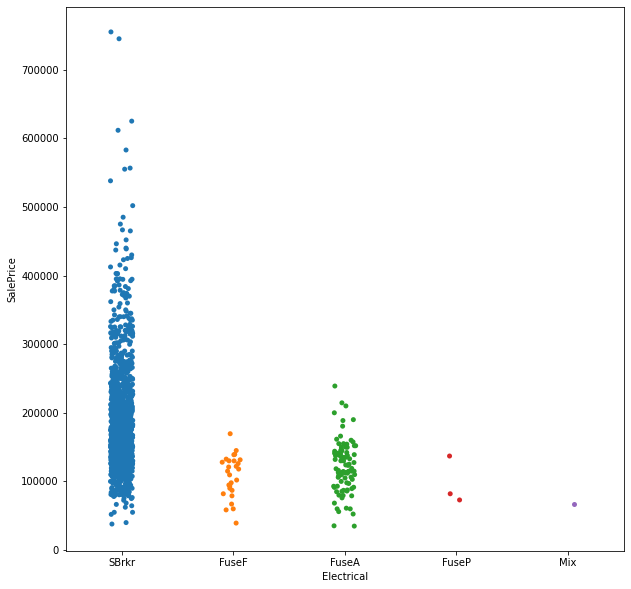

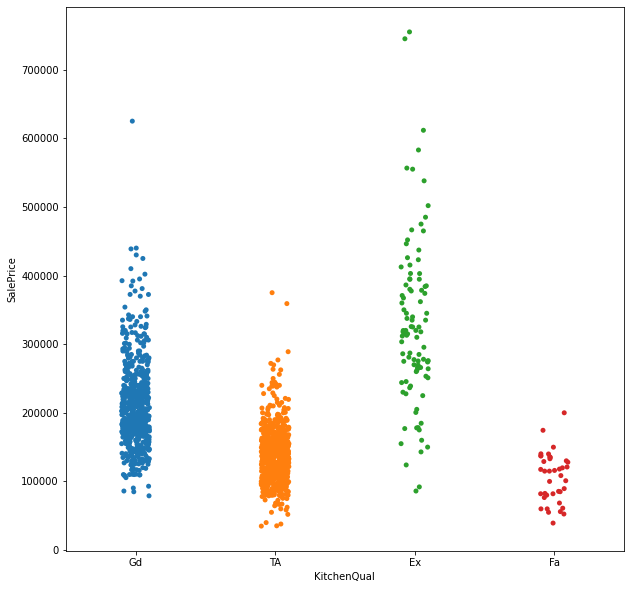

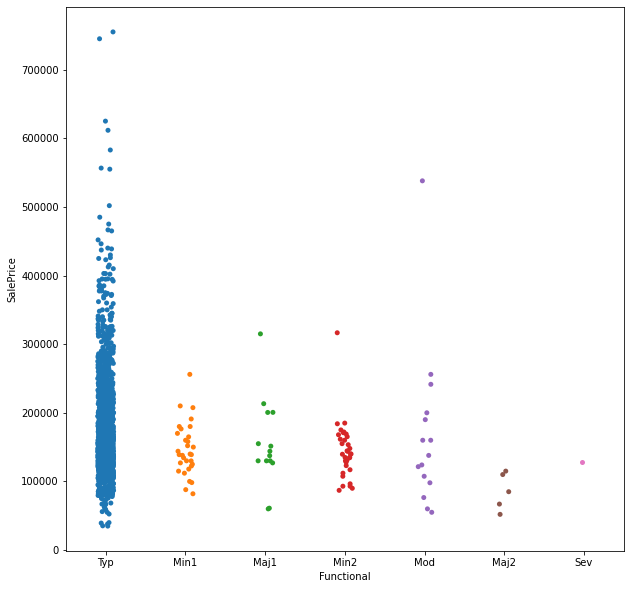

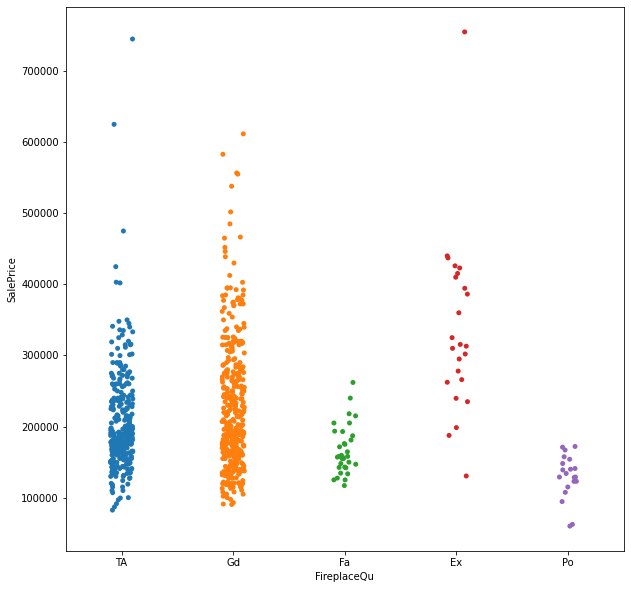

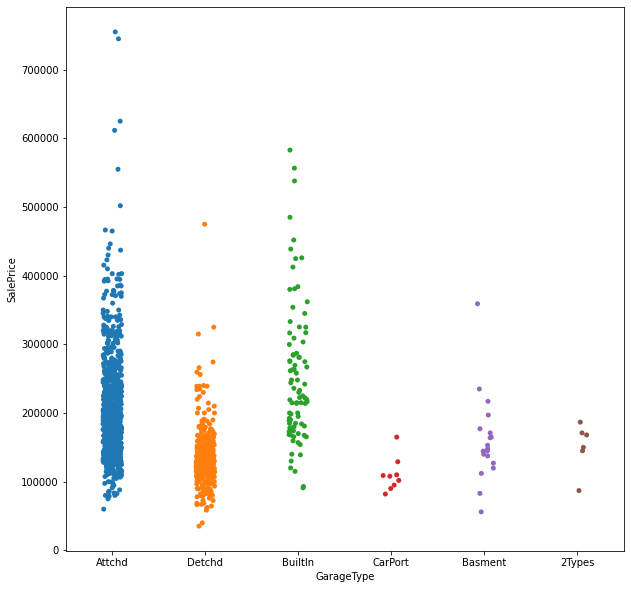

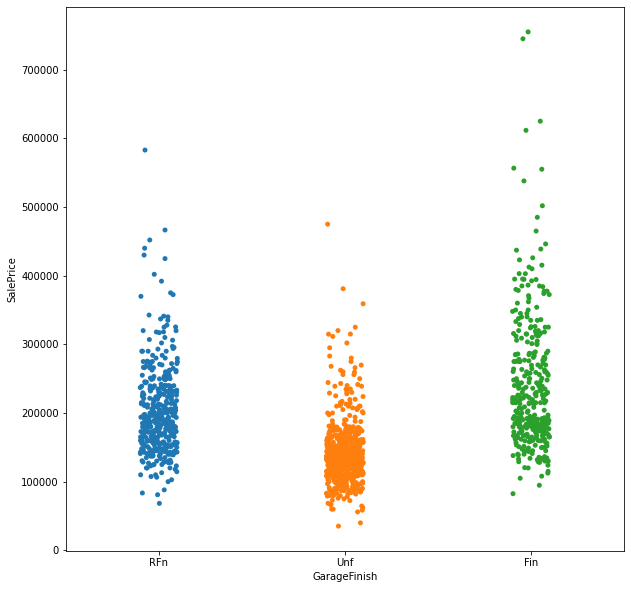

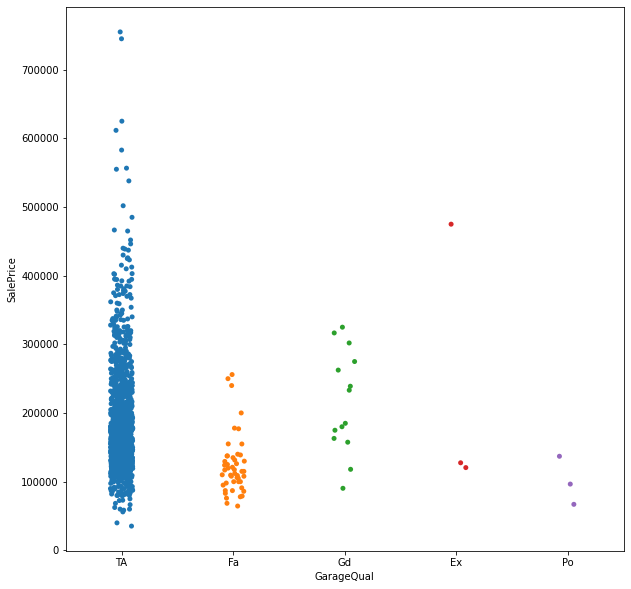

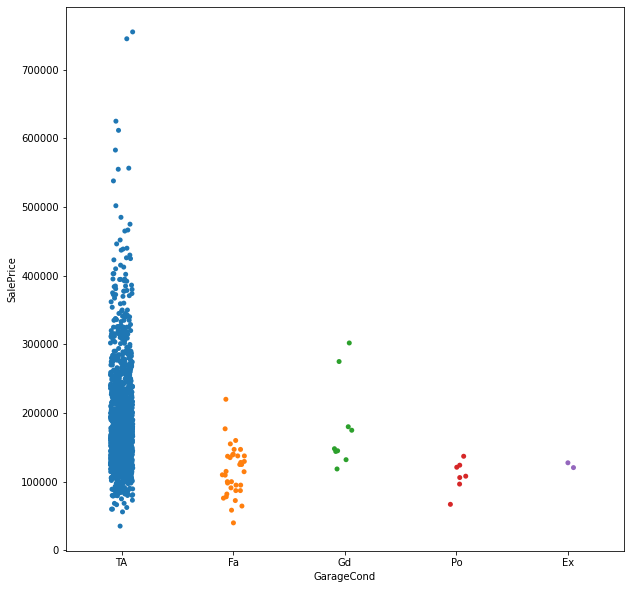

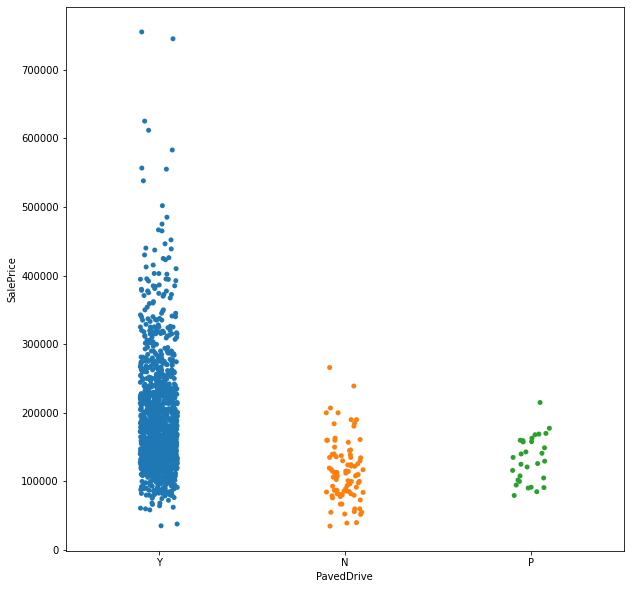

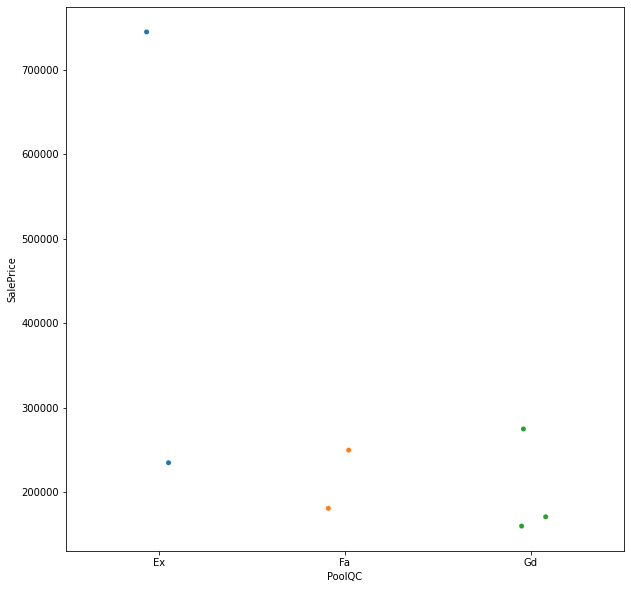

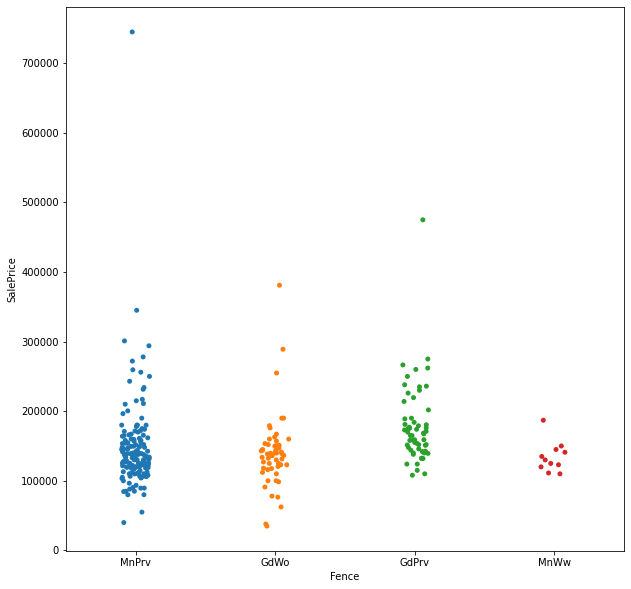

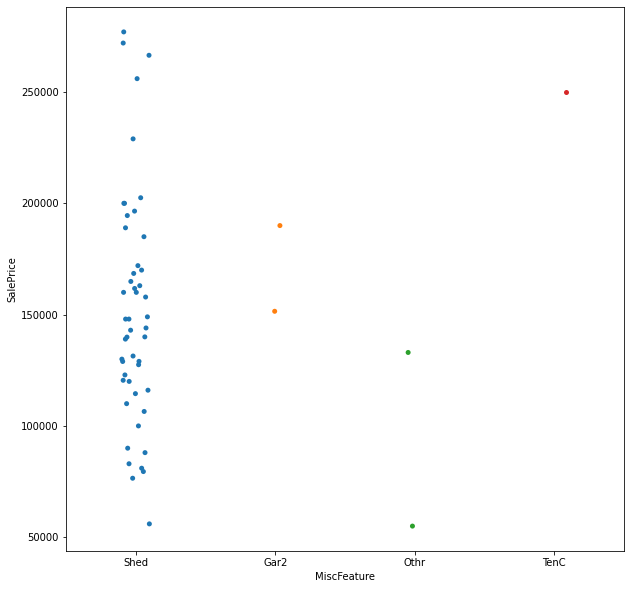

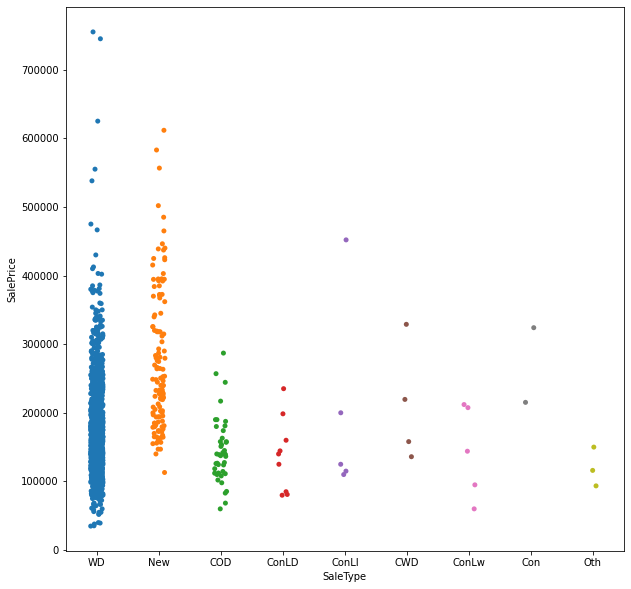

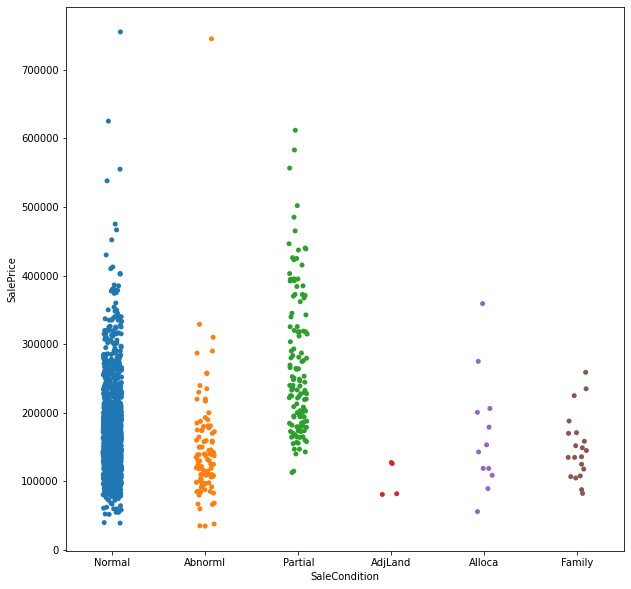

In [ ]:
cat_columns=list(data.select_dtypes(include=['O']).columns)

for num,i in enumerate(cat_columns):
  plt.figure(figsize=(10,10))
  plt.figure(num+1)
  sns.stripplot(x=i,y='SalePrice',data=data)

In [ ]:
data

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

<Figure size 432x288 with 0 Axes>

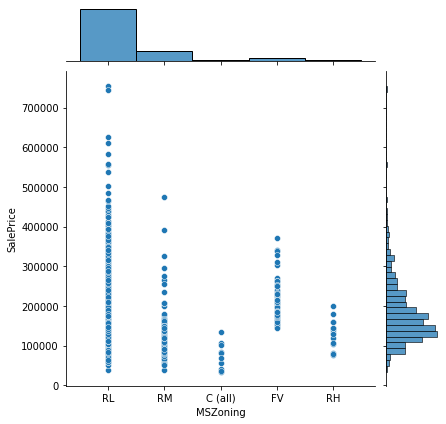

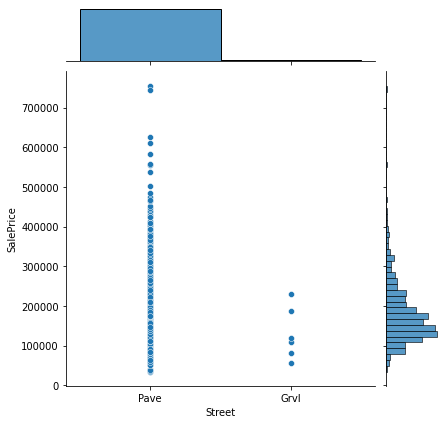

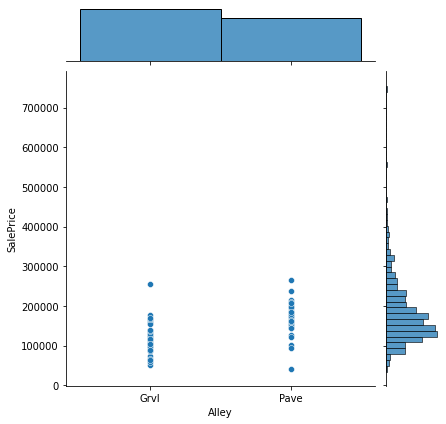

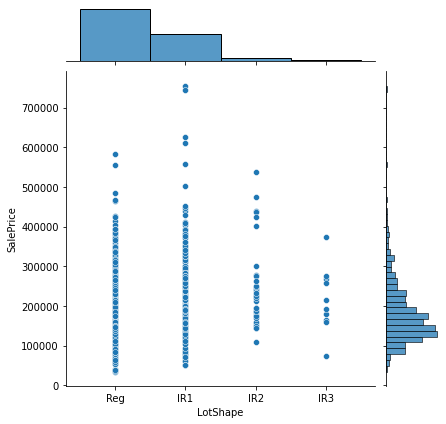

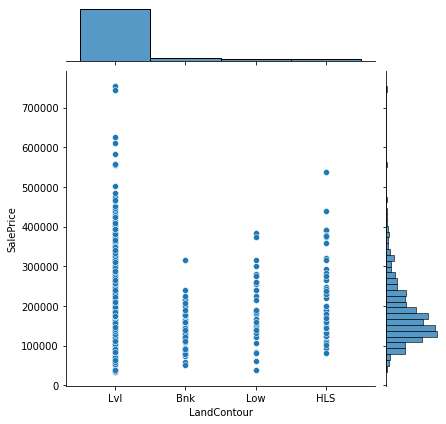

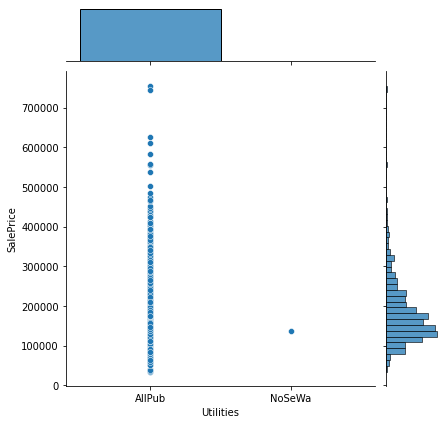

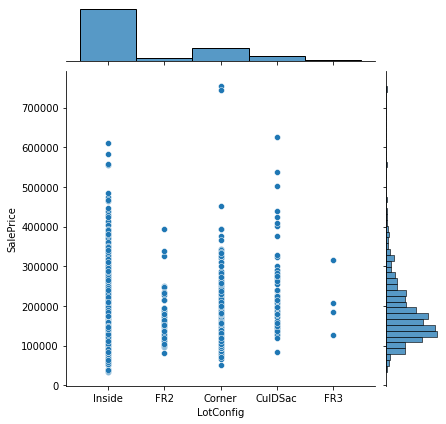

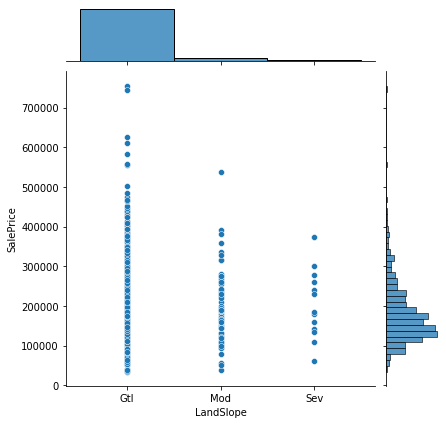

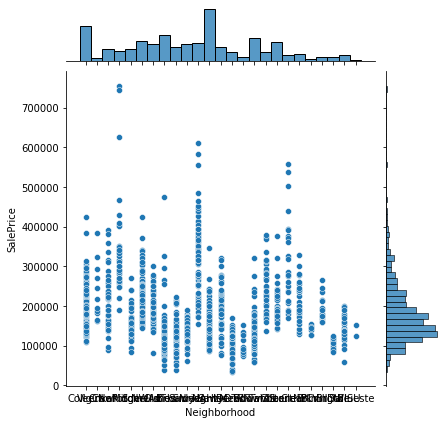

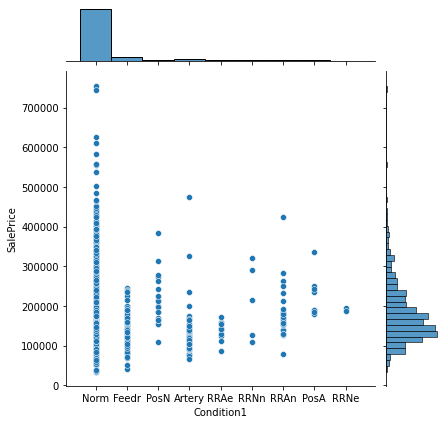

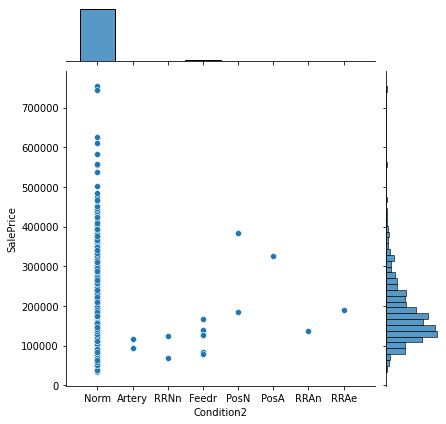

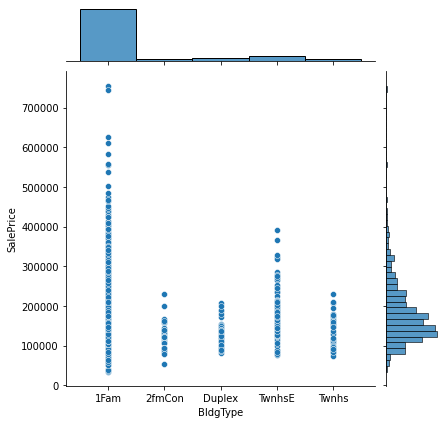

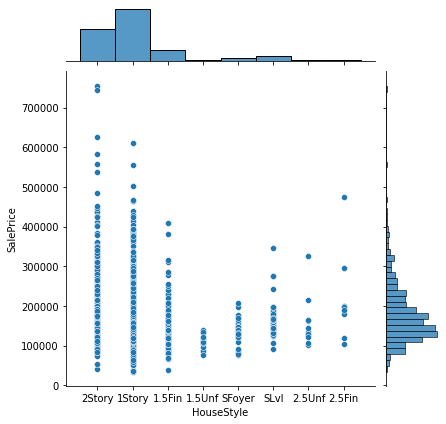

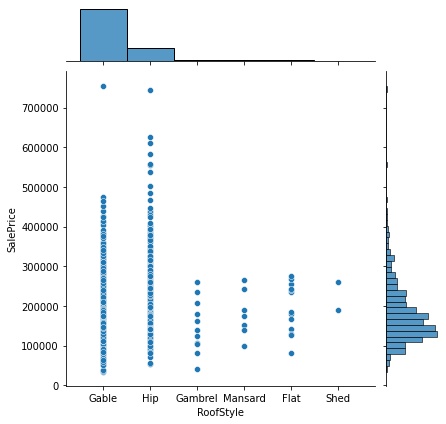

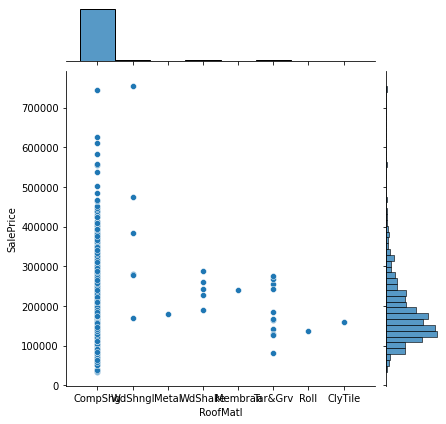

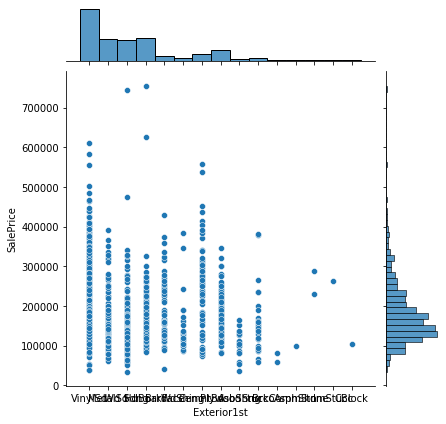

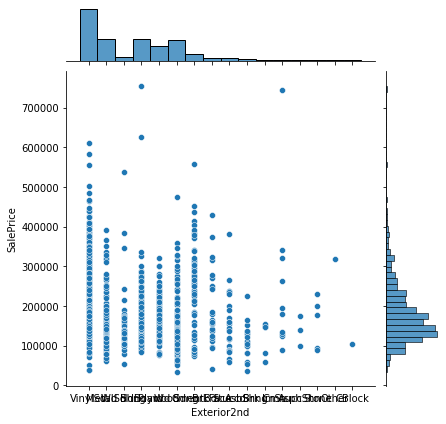

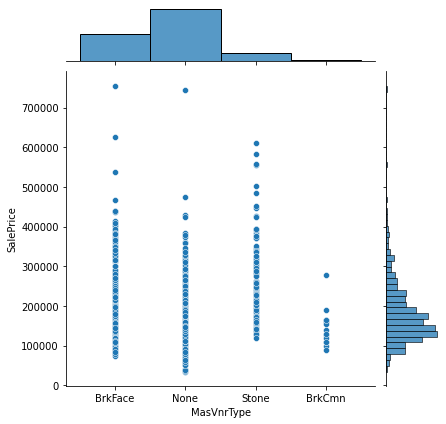

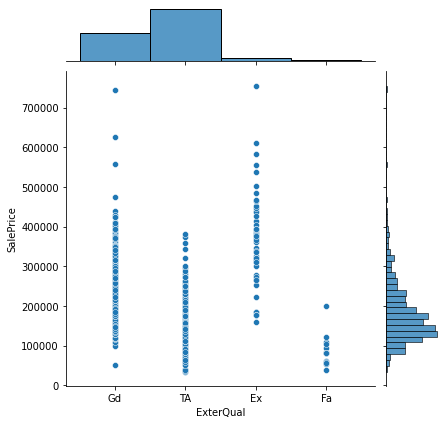

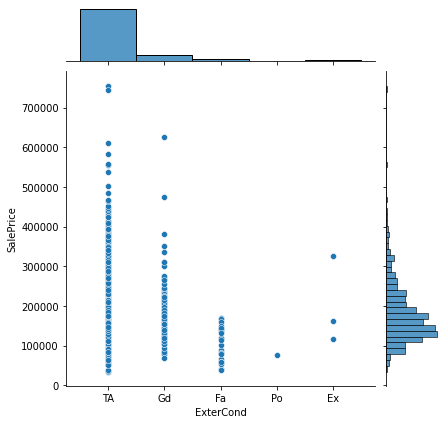

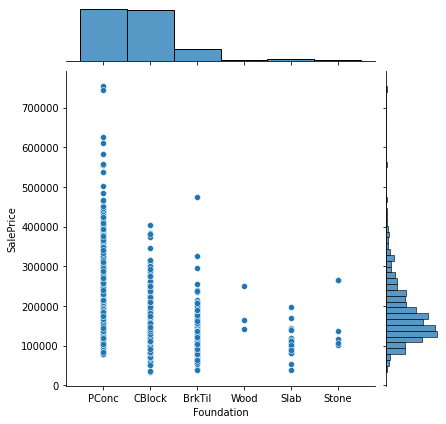

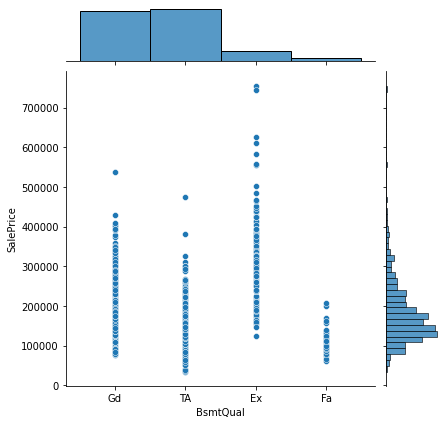

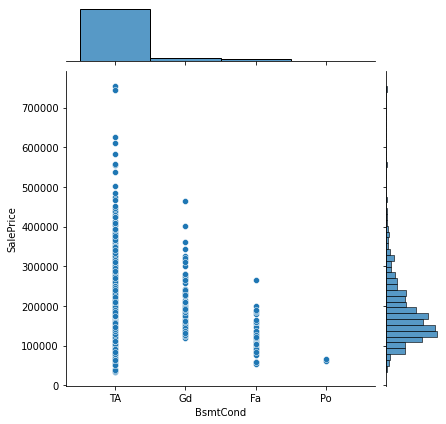

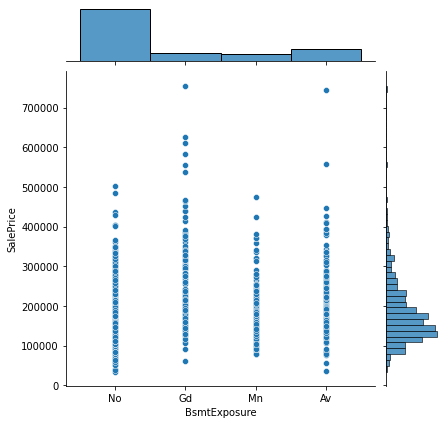

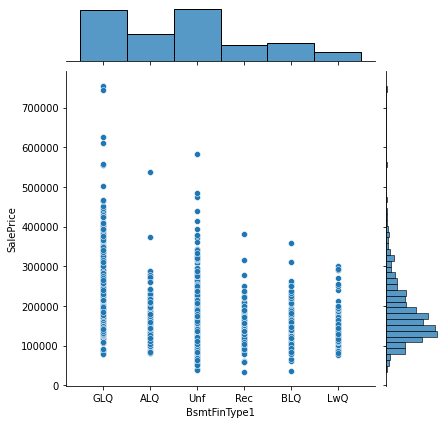

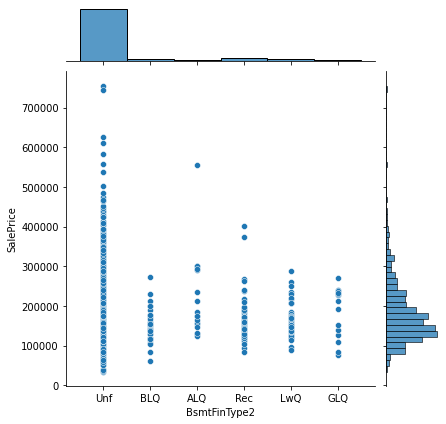

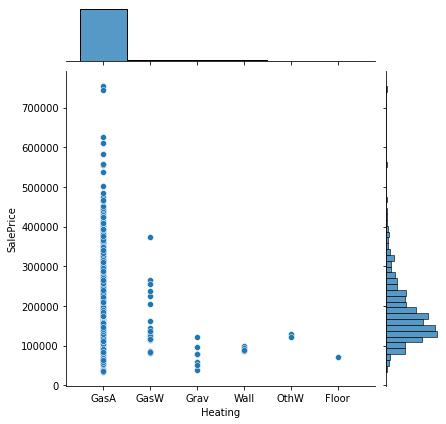

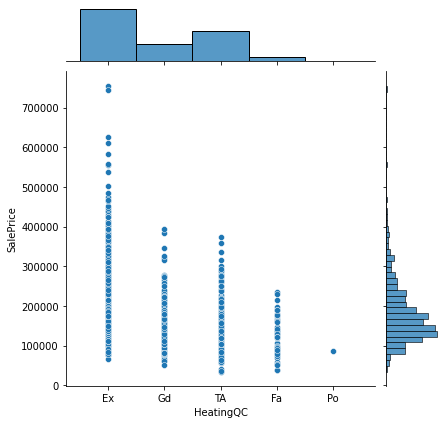

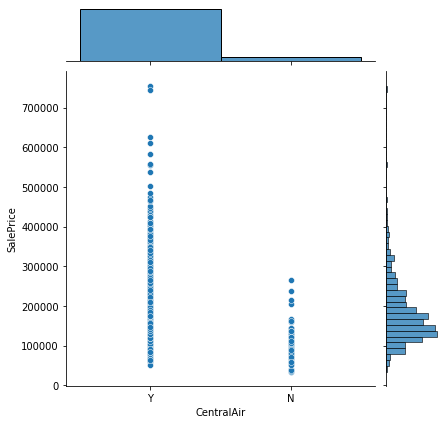

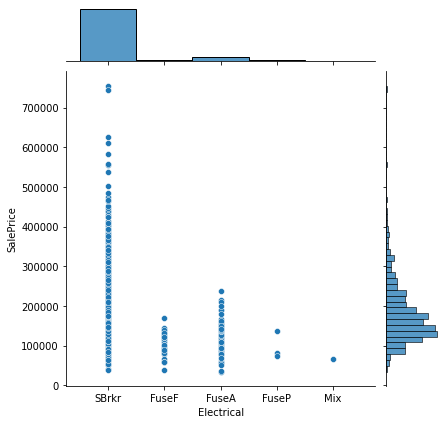

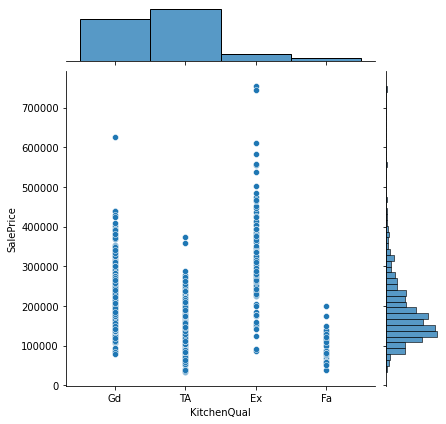

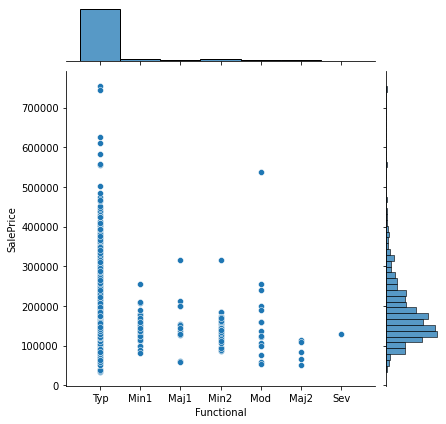

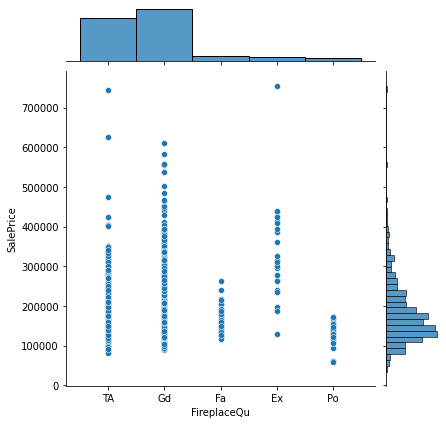

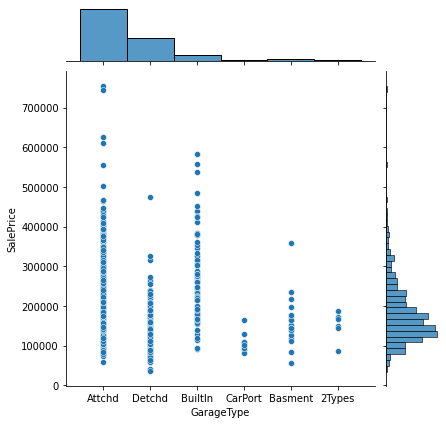

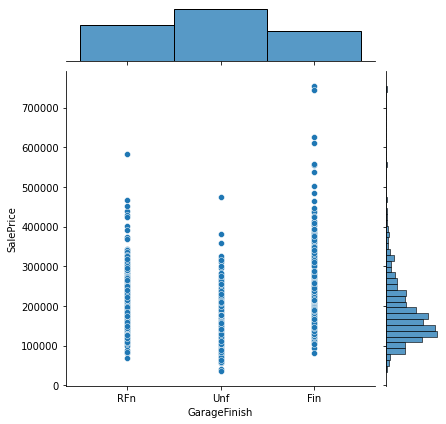

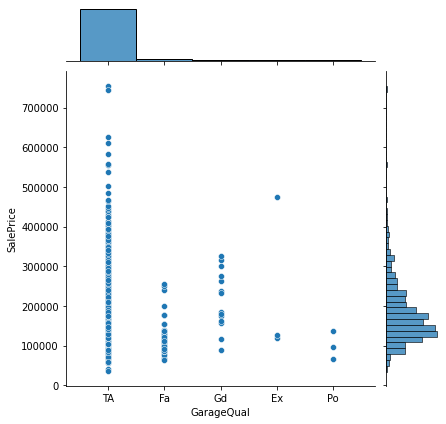

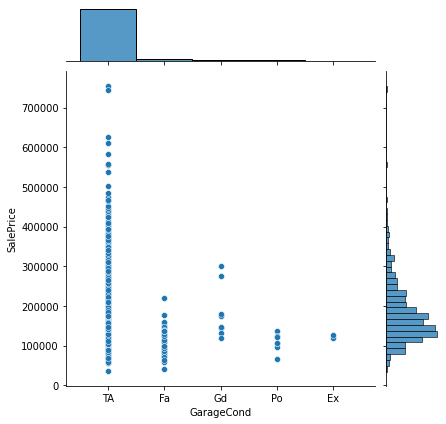

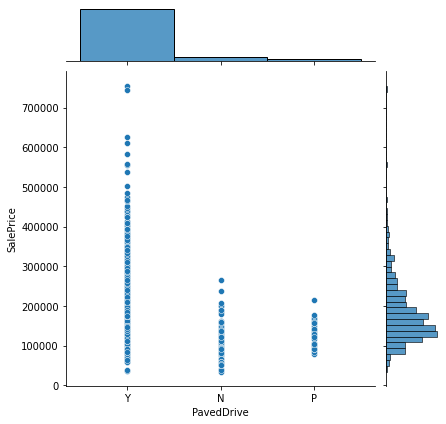

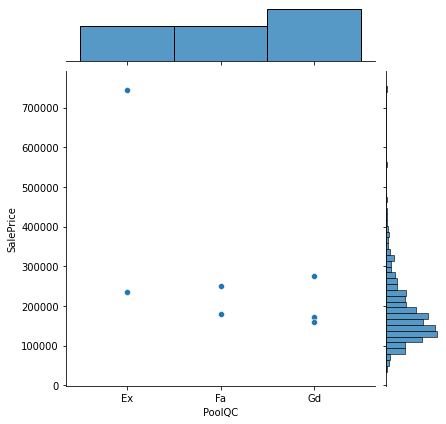

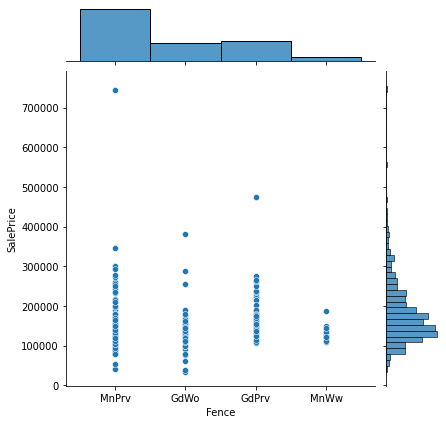

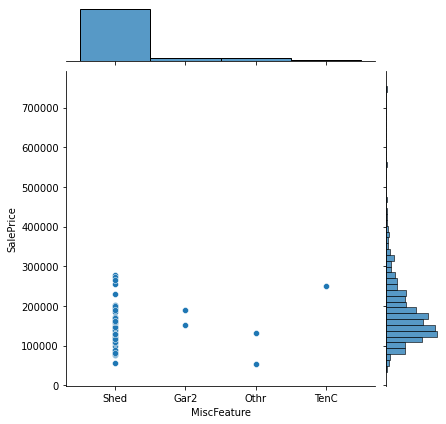

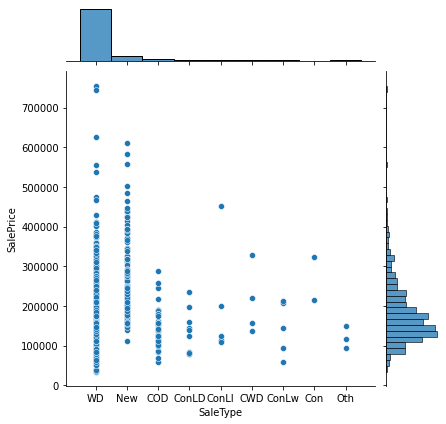

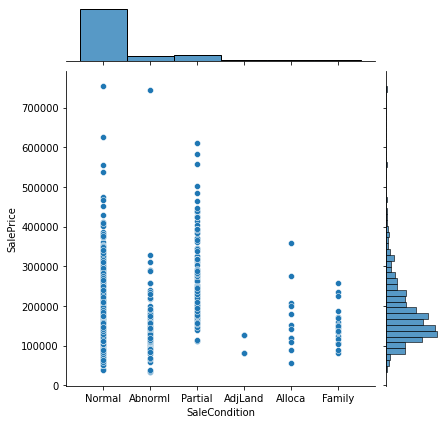

In [ ]:
plt.figure()
for num,i in enumerate(cat_columns):
  plt.figure(num+1)
  sns.jointplot(x=i,y='SalePrice',data=data)

# corelation matrix

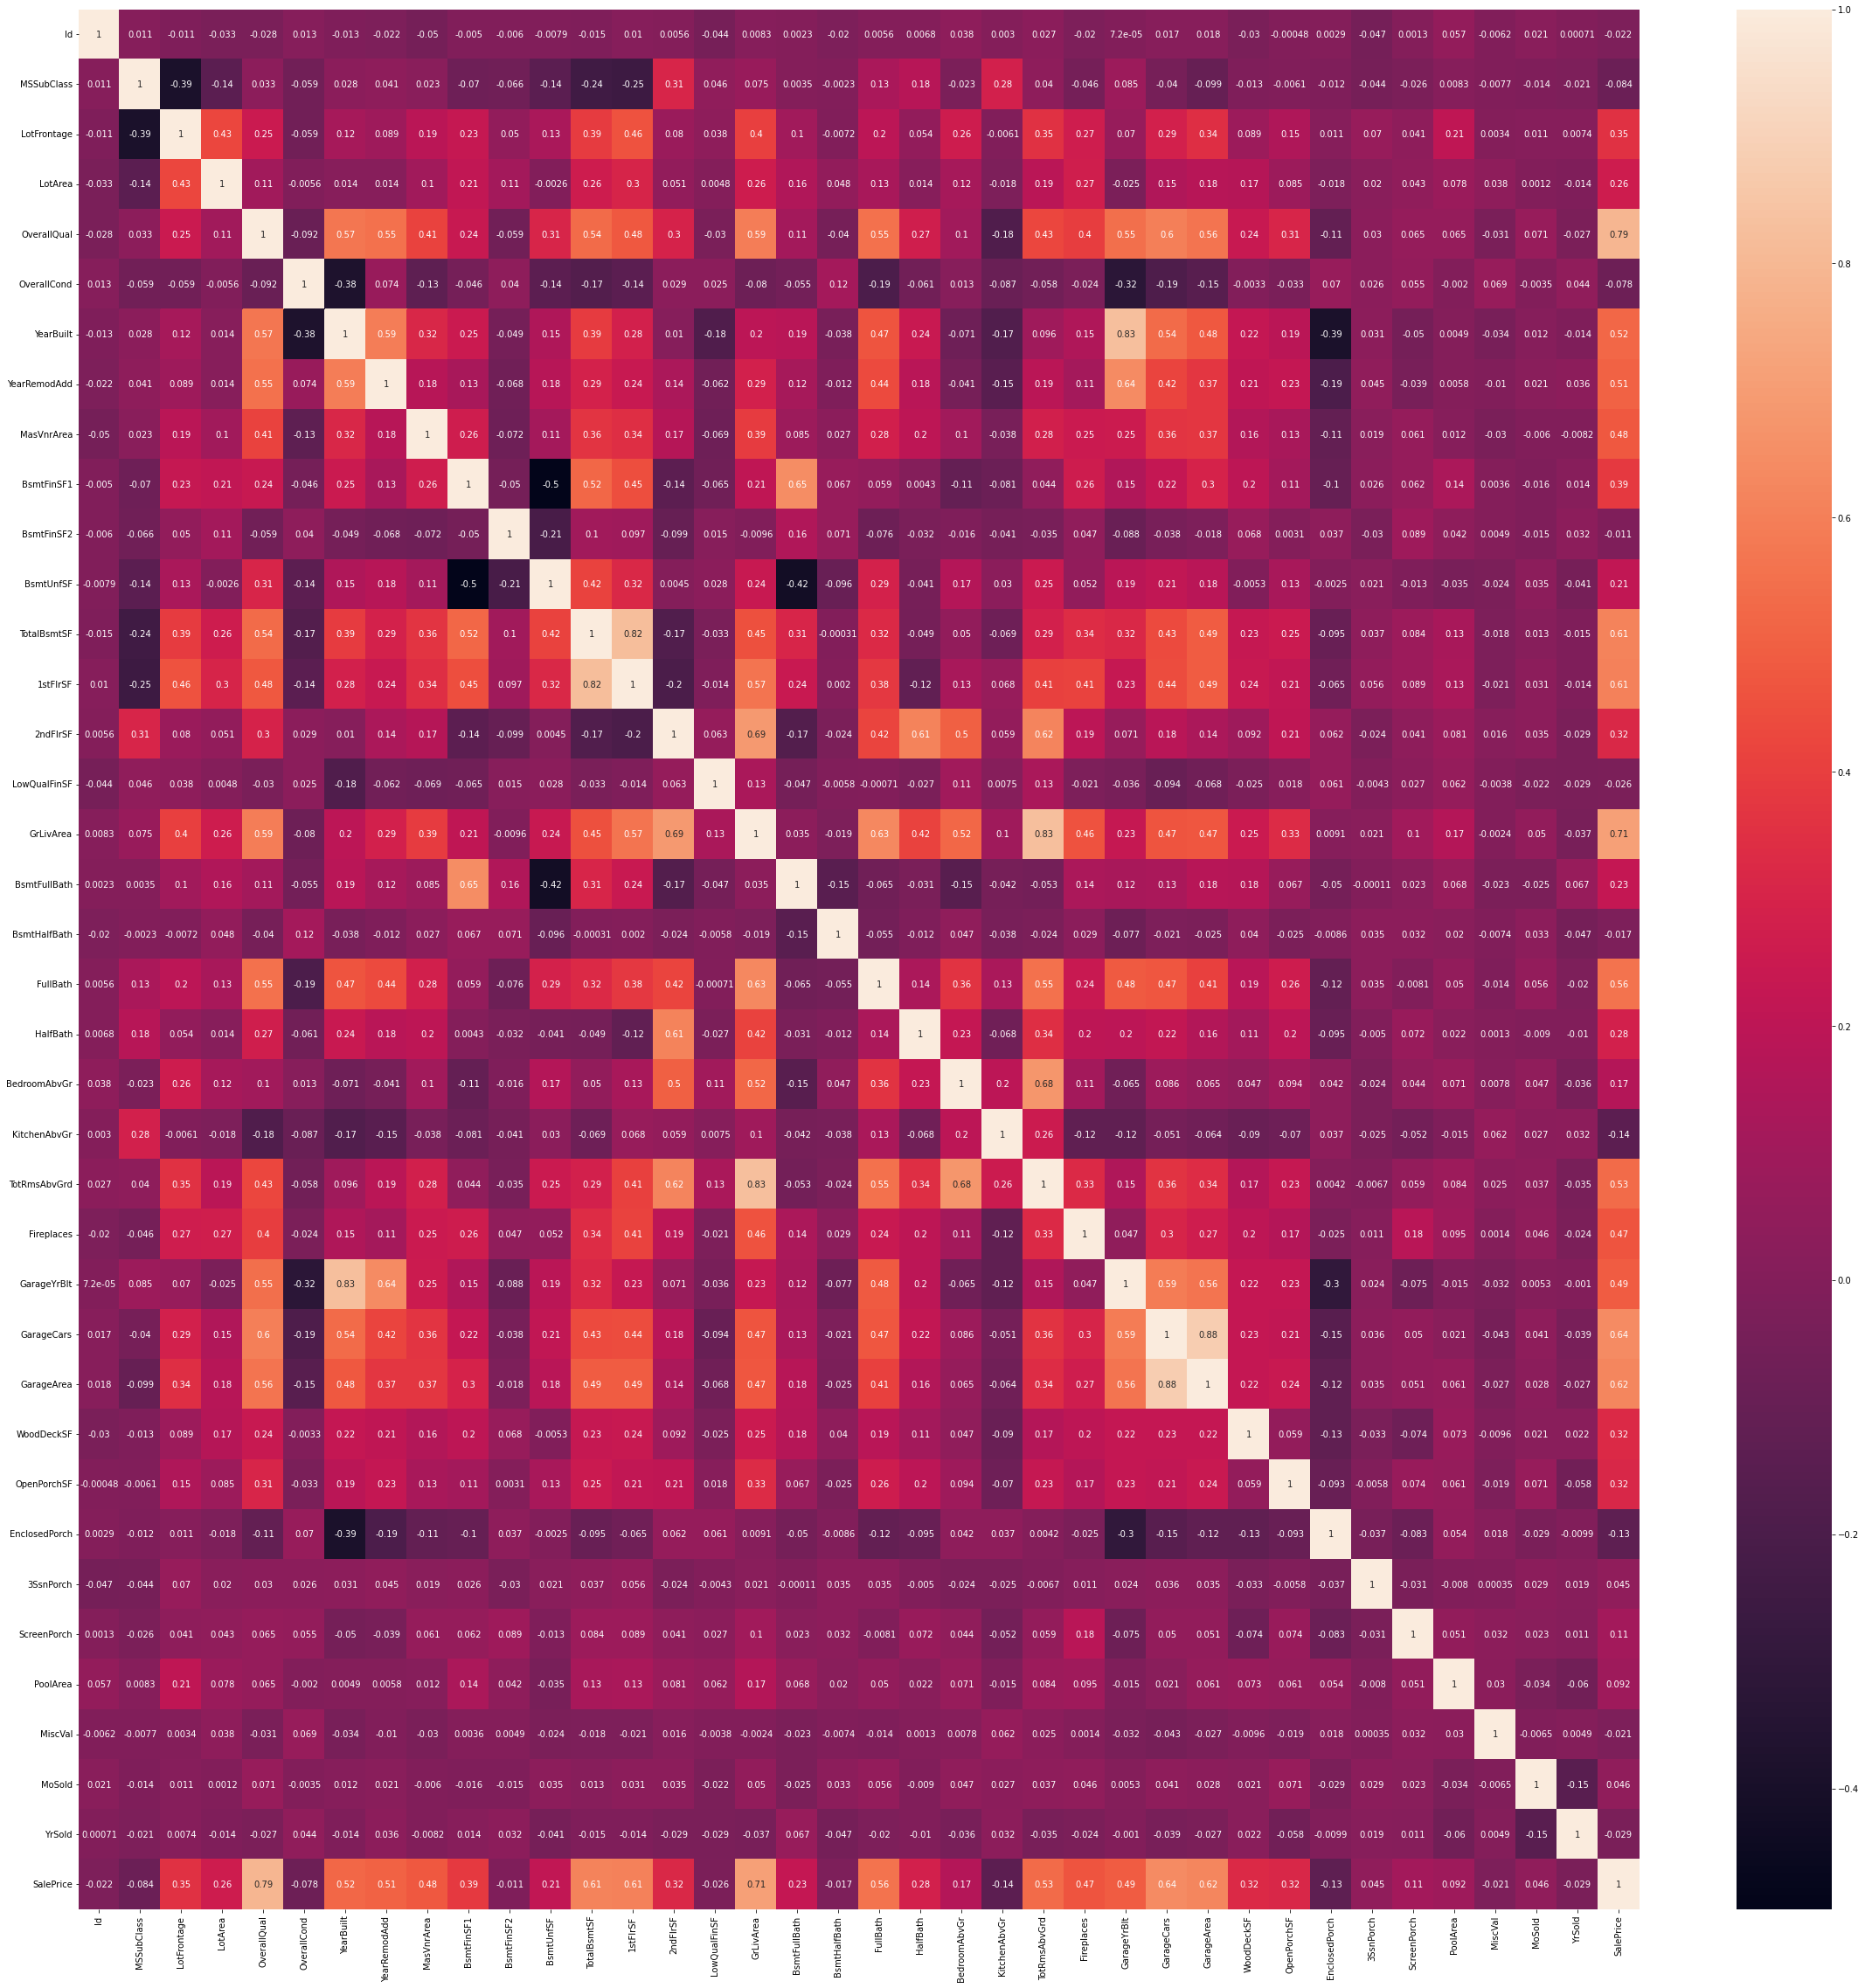

In [ ]:
corr_data=data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_data,annot=True)

In [ ]:
corr_data

Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  0.031706  -0.011378
BsmtUnfSF     -0.007940   -0.140759     0.132644  ...  0.034888 -0.041258   0.214479
TotalBsmtSF   -0.015415   -0.238518     0.392075  ...  0.013196 -0.014969   0.613581
1stFlrSF       0.010496   -0.251758     0.457181  ...  0.031372 -0.013604   0.605852
2ndFlrSF       0.005590    0.307886     0.080177  ...  0.035164 -0.028700   0.319334
LowQualFinSF  -0.044230    0.046474     0.038469  ... -0.022174 -0.028921  -0.025606
GrLivArea      0.008273    0.074853     0.402797  ...  0.050240 -0.036526   0.708624
BsmtFullBath   0.002289    0.003491     0.100949  ... -0.025361  0.067049   0.227122
BsmtHalfBath  -0.020155   -0.002333    -0.007234  ...  0.032873 -0.046524  -0.016844
FullBath       0.005587    0.131608     0.198769  ...  0.055872 -0.019669   0.560664
HalfBath       0.006784    0.177354     0.053532  ... -0.009050 -0.010269   0.284108
BedroomAbvGr   0.037719   -0.023438     0.263170  ...  0.046544 -0.036014   0.168213
KitchenAbvGr   0.002951    0.281721    -0.006069  ...  0.026589  0.031687  -0.135907
TotRmsAbvGrd   0.027239    0.040380     0.352096  ...  0.036907 -0.034516   0.533723
Fireplaces    -0.019772   -0.045569     0.266639  ...  0.046357 -0.024096   0.466929
GarageYrBlt    0.000072    0.085072     0.070250  ...  0.005337 -0.001014   0.486362
GarageCars     0.016570   -0.040110     0.285691  ...  0.040522 -0.039117   0.640409
GarageArea     0.017634   -0.098672     0.344997  ...  0.027974 -0.027378   0.623431
WoodDeckSF    -0.029643   -0.012579     0.088521  ...  0.021011  0.022270   0.324413
OpenPorchSF   -0.000477   -0.006100     0.151972  ...  0.071255 -0.057619   0.315856
EnclosedPorch  0.002889   -0.012037     0.010700  ... -0.028887 -0.009916  -0.128578
3SsnPorch     -0.046635   -0.043825     0.070029  ...  0.029474  0.018645   0.044584
ScreenPorch    0.001330   -0.026030     0.041383  ...  0.023217  0.010694   0.111447
PoolArea       0.057044    0.008283     0.206167  ... -0.033737 -0.059689   0.092404
MiscVal       -0.006242   -0.007683     0.003368  ... -0.006495  0.004906  -0.021190
MoSold         0.021172   -0.013585     0.011200  ...  1.000000 -0.145721   0.046432
YrSold         0.000712   -0.021407     0.007450  ... -0.145721  1.000000  -0.028923
SalePrice     -0.021917   -0.084284     0.351799  ...  0.046432 -0.028923   1.000000

[38 rows x 38 columns]

# outliers

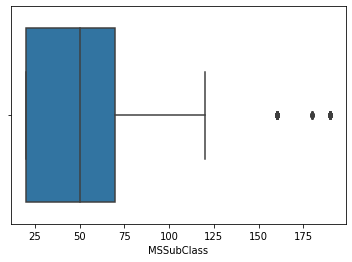

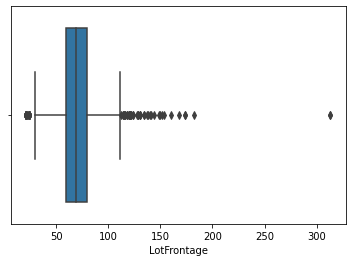

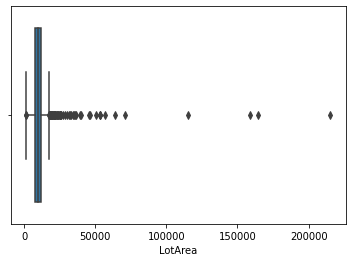

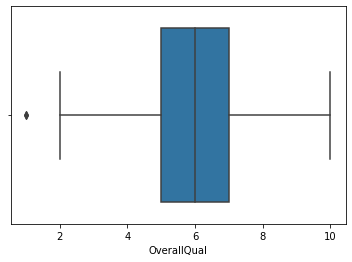

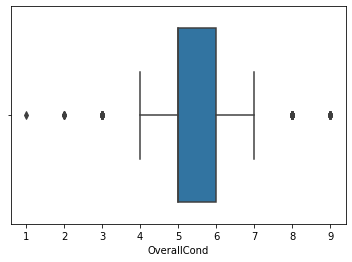

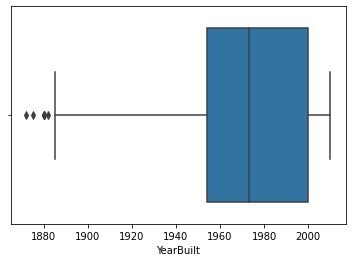

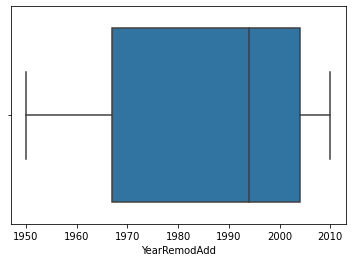

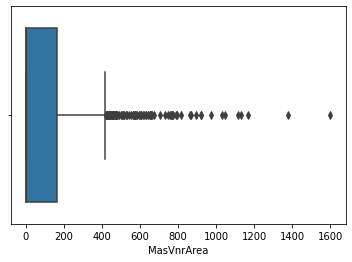

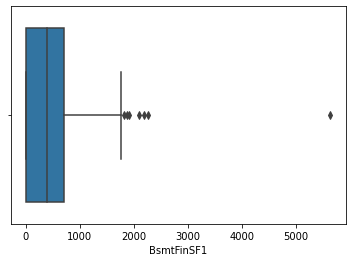

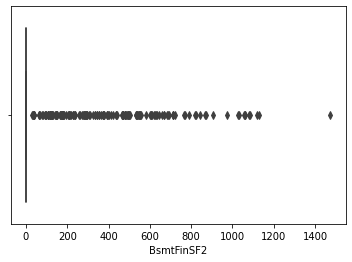

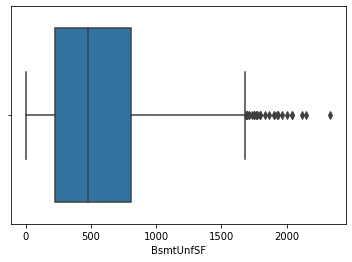

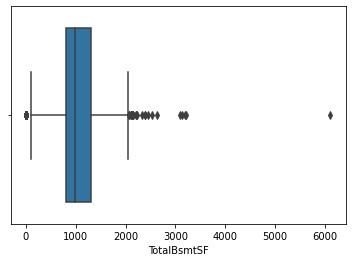

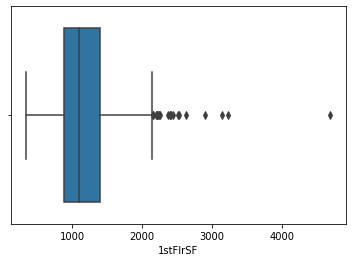

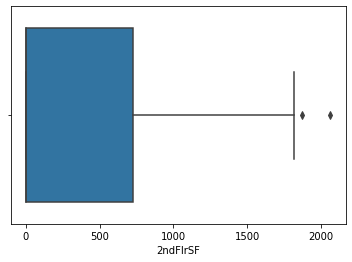

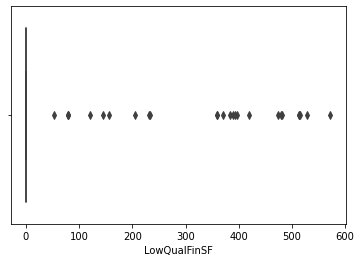

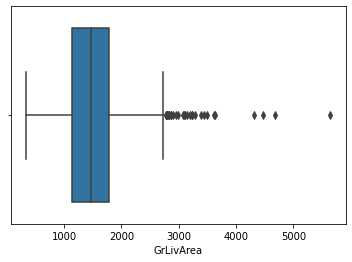

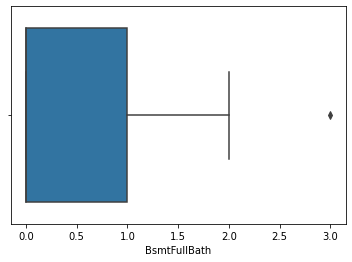

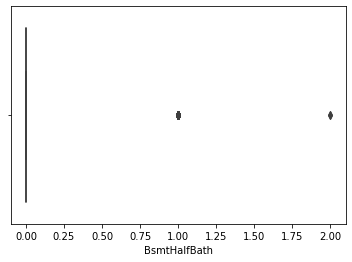

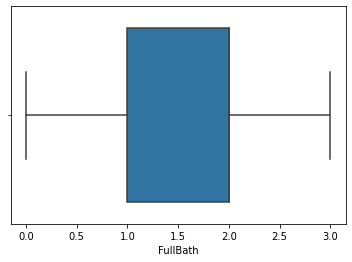

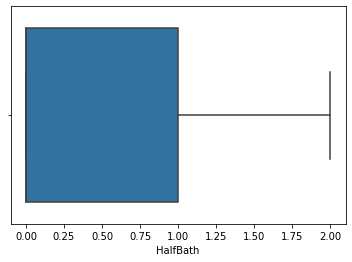

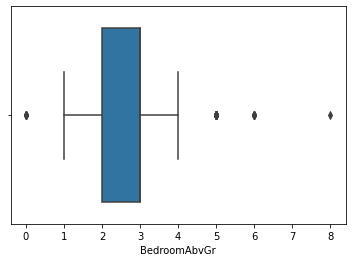

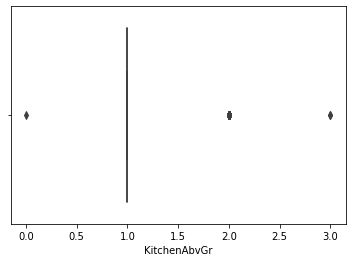

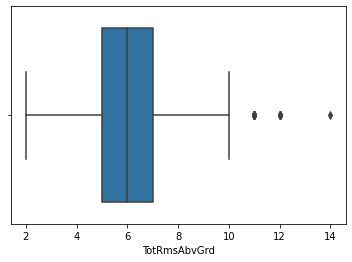

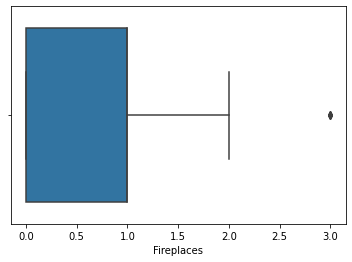

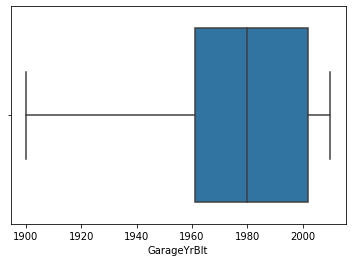

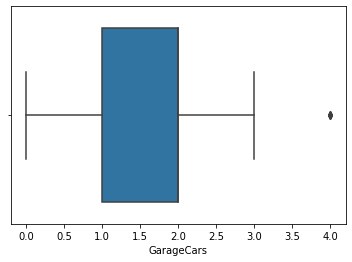

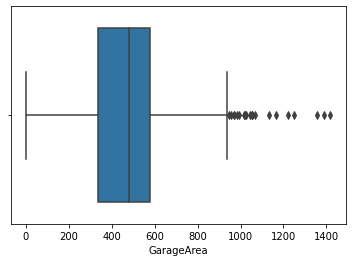

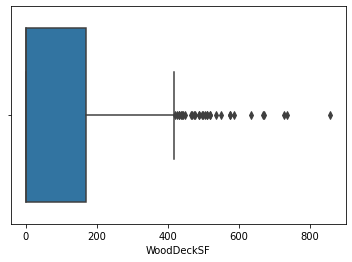

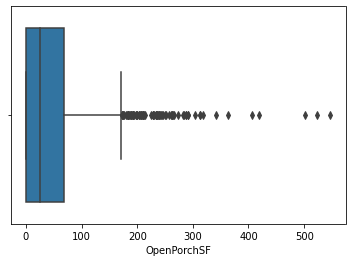

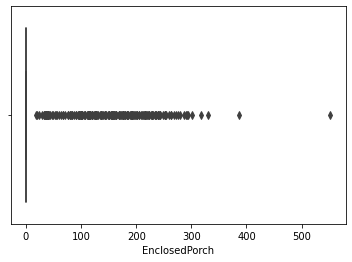

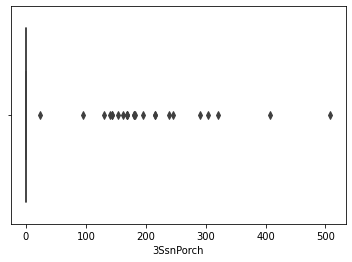

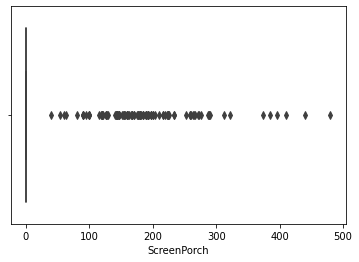

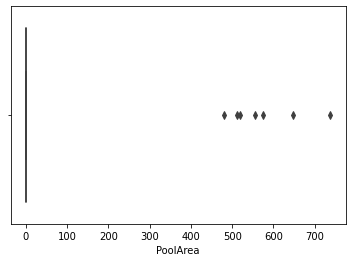

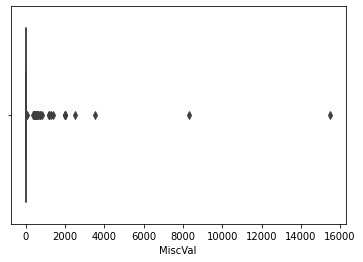

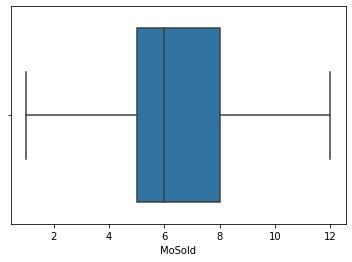

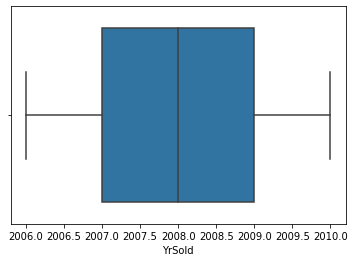

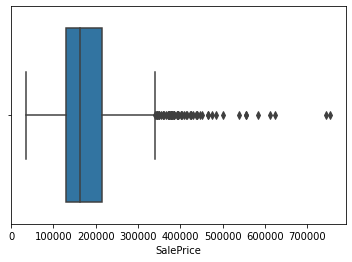

In [ ]:
plt.figure()
for num,i in enumerate(numeric_cols):
  plt.figure(num+1)
  sns.boxplot(x=i,data=data)

# visualizing time series

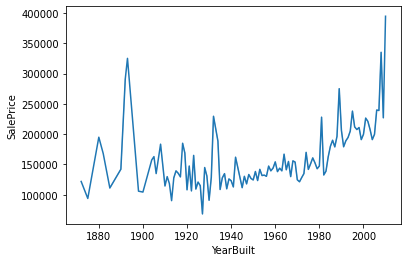

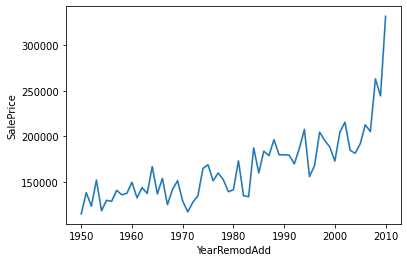

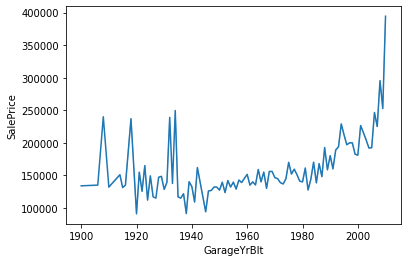

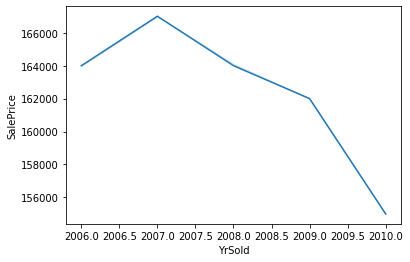

In [ ]:
cols=list(numeric_cols)
time_col=[i for i in cols if 'Y' in i]

plt.figure()
for num,i in enumerate(time_col):
  plt.figure(num+1)
  sns.lineplot(x=i,y='SalePrice',data=data,estimator=np.median,ci=False)

# data cleaning



1.   drop nans with more than 90%
2.   fill numerica nans 
3.   fill character nan
4.   remove outlier


In [ ]:
missing

sum  missing_percent
PoolQC        1453        99.520548
MiscFeature   1406        96.301370
Alley         1369        93.767123
Fence         1179        80.753425
FireplaceQu    690        47.260274
LotFrontage    259        17.739726
GarageCond      81         5.547945
GarageType      81         5.547945
GarageYrBlt     81         5.547945
GarageFinish    81         5.547945
GarageQual      81         5.547945
BsmtExposure    38         2.602740
BsmtFinType2    38         2.602740
BsmtFinType1    37         2.534247
BsmtCond        37         2.534247
BsmtQual        37         2.534247
MasVnrArea       8         0.547945
MasVnrType       8         0.547945
Electrical       1         0.068493

In [ ]:
data.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)


In [ ]:
data.drop(['Fence','FireplaceQu'],axis=1,inplace=True)

In [ ]:
lis=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for i in lis:
  if i  in cat_columns:
    cat_columns.remove(i)

# filling nans in numeric columns

In [ ]:
iter=IterativeImputer()
data[numeric_cols]=iter.fit_transform(data[numeric_cols])

In [ ]:
f=0
for i in numeric_cols:
  for j in range(len(data)):
    if data.loc[j,i]==np.nan:
      print('nan values exists in {col} and in {row} row'.format(col=i,row=j))
    else:
      f=1

if f==1:
  print("no nan in numeric columns")

no nan in numeric columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# checking how many nan are there in categorial column

In [ ]:
missing_cat=data[cat_columns].isnull().sum().sort_values(ascending=False)

col_need_mode=[i for i in cat_columns if missing_cat[i]>0]

In [ ]:
col_need_mode

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
def filling_nans(i):
  data[i].fillna(data[i].mode()[0],inplace=True)

for i in col_need_mode:
  filling_nans(i)

In [ ]:
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
ode=OrdinalEncoder()
data[cat_columns]=ode.fit_transform(data[cat_columns])


In [ ]:
data

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0        1        60.0       3.0  ...       8.0            4.0   208500.0
1        2        20.0       3.0  ...       8.0            4.0   181500.0
2        3        60.0       3.0  ...       8.0            4.0   223500.0
3        4        70.0       3.0  ...       8.0            0.0   140000.0
4        5        60.0       3.0  ...       8.0            4.0   250000.0
...    ...         ...       ...  ...       ...            ...        ...
1455  1456        60.0       3.0  ...       8.0            4.0   175000.0
1456  1457        20.0       3.0  ...       8.0            4.0   210000.0
1457  1458        70.0       3.0  ...       8.0            4.0   266500.0
1458  1459        20.0       3.0  ...       8.0            4.0   142125.0
1459  1460        20.0       3.0  ...       8.0            4.0   147500.0

[1460 rows x 76 columns]

# Checking For Outliers

In [ ]:
data.drop('Id',axis=1,inplace=True)
desc=data.describe()

In [ ]:
desc

MSSubClass     MSZoning  ...  SaleCondition      SalePrice
count  1460.000000  1460.000000  ...    1460.000000    1460.000000
mean     56.897260     3.028767  ...       3.770548  180921.195890
std      42.300571     0.632017  ...       1.100854   79442.502883
min      20.000000     0.000000  ...       0.000000   34900.000000
25%      20.000000     3.000000  ...       4.000000  129975.000000
50%      50.000000     3.000000  ...       4.000000  163000.000000
75%      70.000000     3.000000  ...       4.000000  214000.000000
max     190.000000     4.000000  ...       5.000000  755000.000000

[8 rows x 75 columns]

In [ ]:
column=desc.columns
outliers={}

for i in column:
  q1=data[i].quantile(0.05)
  q3=data[i].quantile(0.93)
  data_no_out=data[(data[i]<q3)&(data[i]>q1)]
  #outliers[i]=[low,high]

In [ ]:
data_no_out

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0           60.0       3.0         65.0  ...       8.0            4.0   208500.0
1           20.0       3.0         80.0  ...       8.0            4.0   181500.0
2           60.0       3.0         68.0  ...       8.0            4.0   223500.0
3           70.0       3.0         60.0  ...       8.0            0.0   140000.0
4           60.0       3.0         84.0  ...       8.0            4.0   250000.0
...          ...       ...          ...  ...       ...            ...        ...
1455        60.0       3.0         62.0  ...       8.0            4.0   175000.0
1456        20.0       3.0         85.0  ...       8.0            4.0   210000.0
1457        70.0       3.0         66.0  ...       8.0            4.0   266500.0
1458        20.0       3.0         68.0  ...       8.0            4.0   142125.0
1459        20.0       3.0         75.0  ...       8.0            4.0   147500.0

[1282 rows x 75 columns]

# selecting the best features

In [ ]:
data_set=data_no_out.copy()

x_data=data_set.iloc[:,:74]
y_data=data_set['SalePrice']


bestfeature=SelectKBest(score_func=chi2,k=10)
new_data_features=bestfeature.fit_transform(x_data,y_data)

In [ ]:
col=list(data_no_out.columns)
filter=bestfeature.get_support().tolist()
selected_columns=[col[num] for num,i in enumerate(filter) if i is True]

In [ ]:
selected_columns

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [ ]:
data=pd.concat([data_no_out[selected_columns],y_data],axis=1)

In [ ]:
data

LotArea  MasVnrArea  BsmtFinSF1  ...  PoolArea  MiscVal  SalePrice
0      8450.0       196.0       706.0  ...       0.0      0.0   208500.0
1      9600.0         0.0       978.0  ...       0.0      0.0   181500.0
2     11250.0       162.0       486.0  ...       0.0      0.0   223500.0
3      9550.0         0.0       216.0  ...       0.0      0.0   140000.0
4     14260.0       350.0       655.0  ...       0.0      0.0   250000.0
...       ...         ...         ...  ...       ...      ...        ...
1455   7917.0         0.0         0.0  ...       0.0      0.0   175000.0
1456  13175.0       119.0       790.0  ...       0.0      0.0   210000.0
1457   9042.0         0.0       275.0  ...       0.0   2500.0   266500.0
1458   9717.0         0.0        49.0  ...       0.0      0.0   142125.0
1459   9937.0         0.0       830.0  ...       0.0      0.0   147500.0

[1282 rows x 11 columns]

# scaling/noramalization


In [ ]:
scaling=MinMaxScaler()
selected_columns.append('SalePrice')
for i in selected_columns:
  data[i]=scaling.fit_transform(data[[i]])

In [ ]:
data

LotArea  MasVnrArea  BsmtFinSF1  ...  PoolArea  MiscVal  SalePrice
0     0.043768    0.122500    0.125089  ...       0.0  0.00000   0.540724
1     0.050808    0.000000    0.173281  ...       0.0  0.00000   0.418552
2     0.060908    0.101250    0.086109  ...       0.0  0.00000   0.608597
3     0.050502    0.000000    0.038271  ...       0.0  0.00000   0.230769
4     0.079334    0.218750    0.116052  ...       0.0  0.00000   0.728507
...        ...         ...         ...  ...       ...      ...        ...
1455  0.040506    0.000000    0.000000  ...       0.0  0.00000   0.389140
1456  0.072692    0.074375    0.139972  ...       0.0  0.00000   0.547511
1457  0.047392    0.000000    0.048724  ...       0.0  0.16129   0.803167
1458  0.051524    0.000000    0.008682  ...       0.0  0.00000   0.240385
1459  0.052871    0.000000    0.147059  ...       0.0  0.00000   0.264706

[1282 rows x 11 columns]

# Training Model

In [ ]:
model_params={'linear regression':{
    'model': LinearRegression(),
    'params':{
        'n_jobs':[1,2,3,4,5,6]
    }
}, 'randomforest':{
    'model':RandomForestRegressor(),
    'params':{
        'n_estimators':[150,200,300,400,500],
        'max_depth':[3,6,9,10,15]
    }
},
    'svm':{
        'model':SVR(),
        'params':{
            'kernel':['kernel','rbf','poly'],
            'gamma':['scale', 'auto'],
            'C':[1.0,2.0,3.0,4.0,5.0]
        }
    }
}

In [ ]:
model_params

{'linear regression': {'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  'params': {'fit_intercept': True}},
 'randomforest': {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False),
  'params': {'max_depth': [3, 6, 9, 10, 15],
   'n_estimators': [150, 200, 300, 400, 500]}},
 'svm': {'model': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  'params': {'C': [1.0, 2.0, 3.0, 4.0, 5.0],
   '

In [ ]:
data=data.sample(frac=1)
train_number= int(len(data)*0.7)
x=data.iloc[:1100,:10]
y=data.iloc[:1100,10]
x_test=data.iloc[1100:,:10]
y_test=data.iloc[1100:,10]

In [ ]:
xtrain_dev,xtest_dev,ytrain_dev,ytest_dev=train_test_split(x,y,test_size=0.2,random_state=3,shuffle=True)

In [ ]:
score=[]
for model_name,param in model_params.items():
  random=RandomizedSearchCV(param['model'],param['params'],n_iter=6,cv=6,return_train_score=False)
  random.fit(xtrain_dev,ytrain_dev)
  score.append({
    'model':model_name,
    'best_score':random.best_score_,
    'best_param':random.best_params_
  })

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'kernel' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'kernel' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'kernel' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be

In [ ]:
score

[{'best_param': {'n_jobs': 1},
  'best_score': 0.31396869828906193,
  'model': 'linear regression'},
 {'best_param': {'max_depth': 15, 'n_estimators': 500},
  'best_score': 0.5816039822650018,
  'model': 'randomforest'},
 {'best_param': {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'},
  'best_score': 0.5796392483555171,
  'model': 'svm'}]

In [ ]:
xtrain_dev

LotArea  MasVnrArea  BsmtFinSF1  ...  3SsnPorch  PoolArea   MiscVal
635   0.058741      0.0000    0.045358  ...        0.0       0.0  0.000000
1021  0.037378      0.0525    0.121191  ...        0.0       0.0  0.000000
1198  0.047747      0.0000    0.000000  ...        0.0       0.0  0.000000
304   0.104591      0.0000    0.000000  ...        0.0       0.0  0.000000
953   0.059837      0.1450    0.099575  ...        0.0       0.0  0.025806
...        ...         ...         ...  ...        ...       ...       ...
1400  0.028771      0.0000    0.000000  ...        0.0       0.0  0.000000
548   0.042452      0.0000    0.031892  ...        0.0       0.0  0.000000
536   0.046670      0.0000    0.000000  ...        0.0       0.0  0.000000
338   0.078630      0.0000    0.037739  ...        0.0       0.0  0.025806
1187  0.068321      0.0000    0.257973  ...        0.0       0.0  0.000000

[880 rows x 10 columns]